## `House Price Predection `


#**Abstract**

The main aim of the notebbok is to predict house sale prices for King County.    
Initial Analysis is done by plotting the outomes of the dataset to check the relationship between various independent and dependent variable(price).Seaborn and Matplotlib are the widely used libraries for plotting the data.
The dataset contains many independent variables which have no direct relationship with the target ,therefore Feature selection is done to get the most important features (independent variables)
Classification and Regression Techniques are used to model the data and train the model with the selected features.
Pipeline and GridSearch Concept is used which automates the process and helps in fetching proper hyperparameter tunning models.
We compare the Base models along with the models after Hyperparameter tunning and we find that the models perform better after hypertunning.

#**DataSet**

King County House Price prediction https://www.kaggle.com/harlfoxem/housesalesprediction/home This dataset contains house sale prices for King County, which includes Seattle. It includes homes sold between May 2014 and May 2015.

Classification tasks:  I have converted the price quantitative variable to a binary classification variable with HIGH price as 1 and LOW price as -1

For Regression : Qauntitive Price Column is used 

#**Approach**

1) **Data Cleansing ** 

2) **Exploratory Data Analysis  **

*   Analysis on Number of houses built each year by answering the below queries
*   Views per house
*   Condition ranking on each house
*   Grades on each house
*   Effect of Waterfront and Basement area on the price of house
*   Does the year in which the house is built has  any influence on House Prices?
*   Variation of Prices as per the Zipcodes

3) **Feature Selection**:    
In order to understand the importance of features and effective relationship of features with 
the dependent variable Price , below techniques are used       


*   PairPlot   
*   SelectModel - Chi-Square    
*    Mutual Info Regressor
*   HeatMap 



4) **Data Modelling **  :
   Model Training is done by parameter tunning through GridSeacrhCV

Classification Models:   

*   Random Forest Classifier   
*   Logisitic Regression
*   SVM   
*   KNN 
*   Ridge Regression


Regression Models                             
*   Random Forest Regressor    
*   XGBoost Regressor
*   KNN      
                 


Import the libraries

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from itertools import chain
from collections import defaultdict


from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression,LogisticRegression
from sklearn.ensemble import RandomForestRegressor,RandomForestClassifier
from sklearn import svm
from sklearn.feature_selection import SelectKBest,chi2,RFE
from sklearn.model_selection import StratifiedKFold
import xgboost as xgboost
from xgboost import XGBRegressor

Lets read the file to check the explore the data

In [0]:
from google.colab import drive

In [80]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
# !ls "/content/drive/My Drive"

In [0]:
from google.colab import files
uploaded = files.upload()

Saving house_data.csv to house_data.csv


In [0]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "house_data.csv" with length 3143355 bytes


In [0]:
import io
df_house_data = pd.read_csv(io.BytesIO(uploaded['house_data.csv']))

From the below dataset it is observed that there are few columns which can be reduced to one column each.   
New columns are created having details of below:       
       Grade = details of grade1 - grade 10 column   
       Floors = details of floor 1 - floor 3.5   
       View = details of ciew 0 - view 4   
       Condition = details of condition 1 -condition 5    

In [0]:
df_house_data.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,grade10,grade11,grade12,grade13,zipcode98004,zipcode98102,zipcode98109,zipcode98112,zipcode98039,zipcode98040
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,0,0,0,0,0
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,0,0,0,0,0
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,0,0,0,0,0
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,0,0,0,0,0
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,0,0,0,0,0


In [109]:
df_house_data = df_house_data.reset_index(drop=True)
df_house_data.head()

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,zipcode98102,zipcode98109,zipcode98112,zipcode98039,zipcode98040,View,Grade,Condition,Floor,ZipCode
0,16768,437500,3,2.25,1970,35100,0,1970,0,1977,...,0,0,0,0,0,1.0,9.0,4.0,2.0,0
1,9596,790000,3,2.50,2600,4750,0,1700,900,1951,...,0,0,0,0,0,1.0,9.0,4.0,1.0,0
2,9587,675000,5,2.50,2820,67518,0,2820,0,1979,...,0,0,0,0,0,1.0,8.0,3.0,2.0,0
3,20602,555000,4,2.50,3310,6500,0,3310,0,2012,...,0,0,0,0,0,1.0,8.0,3.0,2.0,0
4,11577,440000,4,2.25,2160,8119,0,1080,1080,1966,...,0,0,0,0,0,1.0,8.0,3.0,1.0,0


#** Part 1: Data Frame Cleansing and Reformation**

Reordering the columns to make the datframe compact

In [0]:
df_house_data.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors1.0', 'floors1.5', 'floors2.0', 'floors2.5',
       'floors3.0', 'floors3.5', 'view0', 'view1', 'view2', 'view3', 'view4',
       'condition1', 'condition2', 'condition3', 'condition4', 'condition5',
       'grade1', 'grade3', 'grade4', 'grade5', 'grade6', 'grade7', 'grade8',
       'grade9', 'grade10', 'grade11', 'grade12', 'grade13', 'zipcode98004',
       'zipcode98102', 'zipcode98109', 'zipcode98112', 'zipcode98039',
       'zipcode98040'],
      dtype='object')

In [0]:
## Move all the data of View Columns to View Column

df_house_data.loc[df_house_data.view0 == 1, 'View'] = 1
df_house_data.loc[df_house_data.view1 == 1, 'View'] = 2 
df_house_data.loc[df_house_data.view2 == 1, 'View'] = 3
df_house_data.loc[df_house_data.view3 == 1, 'View'] = 4
df_house_data.loc[df_house_data.view4 == 1, 'View'] = 5

## Move all the data of grade Columns to Grade Column
df_house_data.loc[df_house_data.grade1 == 1, 'Grade'] = 1
df_house_data.loc[df_house_data.grade3 == 1, 'Grade'] = 3 
df_house_data.loc[df_house_data.grade4 == 1, 'Grade'] = 4
df_house_data.loc[df_house_data.grade5 == 1, 'Grade'] = 5
df_house_data.loc[df_house_data.grade6 == 1, 'Grade'] = 6
df_house_data.loc[df_house_data.grade7 == 1, 'Grade'] = 7
df_house_data.loc[df_house_data.grade8 == 1, 'Grade'] = 8 
df_house_data.loc[df_house_data.grade9 == 1, 'Grade'] = 9
df_house_data.loc[df_house_data.grade10 == 1, 'Grade'] = 10
df_house_data.loc[df_house_data.grade11 == 1, 'Grade'] = 11
df_house_data.loc[df_house_data.grade12 == 1, 'Grade'] = 12
df_house_data.loc[df_house_data.grade13 == 1, 'Grade'] = 13

## Move all the data of condition Columns to Condition Column
df_house_data.loc[df_house_data.condition1 == 1, 'Condition'] = 1
df_house_data.loc[df_house_data.condition2 == 1, 'Condition'] = 2
df_house_data.loc[df_house_data.condition3 == 1, 'Condition'] = 3
df_house_data.loc[df_house_data.condition4 == 1, 'Condition'] = 4
df_house_data.loc[df_house_data.condition5 == 1, 'Condition'] = 5

## Move all the data of floor Columns to Floor Column
df_house_data.loc[df_house_data['floors1.0'] == 1, 'Floor'] = 1
df_house_data.loc[df_house_data['floors1.5'] == 1, 'Floor'] = 1.5
df_house_data.loc[df_house_data['floors2.0'] == 1, 'Floor'] = 2
df_house_data.loc[df_house_data['floors2.5'] == 1, 'Floor'] = 2.5
df_house_data.loc[df_house_data['floors3.0'] == 1, 'Floor'] = 3
df_house_data.loc[df_house_data['floors3.5'] == 1, 'Floor'] = 3.5


In [0]:
def zipcode(row):
    if row['zipcode98040'] == 1:
        return '98004'
    if row['zipcode98102'] == 1:
        return '98102'
    if row['zipcode98109'] == 1:
        return '98109'
    if row['zipcode98112'] == 1:
        return '98112'
    if row['zipcode98039'] == 1:
        return '98039'
    if row['zipcode98040'] == 1:
        return '98040'
    else:
        return 0
    
## Move all the data of zipcode Columns to Zipcode Column   
df_house_data['ZipCode']=df_house_data.apply(zipcode,axis =1)


Check the added columns appended

In [0]:
df_house_data.columns

Index(['index', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'floors1.0', 'floors1.5', 'floors2.0', 'floors2.5',
       'floors3.0', 'floors3.5', 'view0', 'view1', 'view2', 'view3', 'view4',
       'condition1', 'condition2', 'condition3', 'condition4', 'condition5',
       'grade1', 'grade3', 'grade4', 'grade5', 'grade6', 'grade7', 'grade8',
       'grade9', 'grade10', 'grade11', 'grade12', 'grade13', 'zipcode98004',
       'zipcode98102', 'zipcode98109', 'zipcode98112', 'zipcode98039',
       'zipcode98040', 'View', 'Grade', 'Condition', 'Floor', 'ZipCode'],
      dtype='object')

33 bedroom number seems to be irrelevant after bedroom number 11 , lets replace this with 12

In [0]:
df_house_data.loc[df_house_data['bedrooms'] == 33 ,'bedrooms'] = 12

In [0]:
df_house_data[df_house_data['bedrooms'] ==12]

,index,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,...,zipcode98102,zipcode98109,zipcode98112,zipcode98039,zipcode98040,View,Grade,Condition,Floor,ZipCode


Drop all the irrelevant columns from floor1.0- zipcode98040

In [0]:
df_house_data_reordered = df_house_data.drop(['index','floors1.0', 'floors1.5', 'floors2.0', 'floors2.5',
       'floors3.0', 'floors3.5', 'view0', 'view1', 'view2', 'view3', 'view4',
       'condition1', 'condition2', 'condition3', 'condition4', 'condition5',
       'grade1', 'grade3', 'grade4', 'grade5', 'grade6', 'grade7', 'grade8',
       'grade9', 'grade10', 'grade11', 'grade12', 'grade13', 'zipcode98004',
       'zipcode98102', 'zipcode98109', 'zipcode98112', 'zipcode98039','zipcode98040'],axis = 1)

In [0]:
df_house_data_reordered.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'View', 'Grade', 'Condition', 'Floor', 'ZipCode'],
      dtype='object')

Check the data in our new Columns 

In [0]:
df_house_data_reordered.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,...,long,sqft_living15,sqft_lot15,basement_present,renovated,View,Grade,Condition,Floor,ZipCode
0,437500,3,2.25,1970,35100,0,1970,0,1977,0,...,-121.991,2340,35100,0,0,1.0,9.0,4.0,2.0,0
1,790000,3,2.50,2600,4750,0,1700,900,1951,0,...,-122.400,2380,4750,1,0,1.0,9.0,4.0,1.0,0
2,675000,5,2.50,2820,67518,0,2820,0,1979,0,...,-122.025,2820,48351,0,0,1.0,8.0,3.0,2.0,0
3,555000,4,2.50,3310,6500,0,3310,0,2012,0,...,-121.870,2380,5000,0,0,1.0,8.0,3.0,2.0,0
4,440000,4,2.25,2160,8119,0,1080,1080,1966,0,...,-122.177,1850,9000,1,0,1.0,8.0,3.0,1.0,0


In [112]:
df_house_data_reordered.reset_index(drop=True).head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,...,long,sqft_living15,sqft_lot15,basement_present,renovated,View,Grade,Condition,Floor,ZipCode
0,437500,3,2.25,1970,35100,0,1970,0,1977,0,...,-121.991,2340,35100,0,0,1.0,9.0,4.0,2.0,0
1,790000,3,2.50,2600,4750,0,1700,900,1951,0,...,-122.400,2380,4750,1,0,1.0,9.0,4.0,1.0,0
2,675000,5,2.50,2820,67518,0,2820,0,1979,0,...,-122.025,2820,48351,0,0,1.0,8.0,3.0,2.0,0
3,555000,4,2.50,3310,6500,0,3310,0,2012,0,...,-121.870,2380,5000,0,0,1.0,8.0,3.0,2.0,0
4,440000,4,2.25,2160,8119,0,1080,1080,1966,0,...,-122.177,1850,9000,1,0,1.0,8.0,3.0,1.0,0


In [0]:
df_house_data_reordered.to_csv("C:\\Users\\nikhi\\data\\house_data_reordered.csv")

Check if there are any NA values in the dataframe

In [0]:
df_house_data_reordered.isna().sum()

price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
waterfront          0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
basement_present    0
renovated           0
View                0
Grade               0
Condition           0
Floor               0
ZipCode             0
dtype: int64

#**Part 2 : Exploratory Data Analysis (EDA)**

     1)      Analysis on Number of houses built each year

Lets explore the dataset to get the insights from data

Lets plot the number of houses bulit each year.

From below it is observed that maximum houses of 559 are bulit in 2014 

In [0]:
df_house_data_reordered.sort_values('yr_built',ascending=False)
count = df_house_data_reordered.yr_built.value_counts()
count.sort_values(ascending=False)
df = pd.DataFrame(count)
df.reset_index().head()

,index,yr_built
0,2014,559
1,2006,454
2,2005,450
3,2004,433
4,2003,422


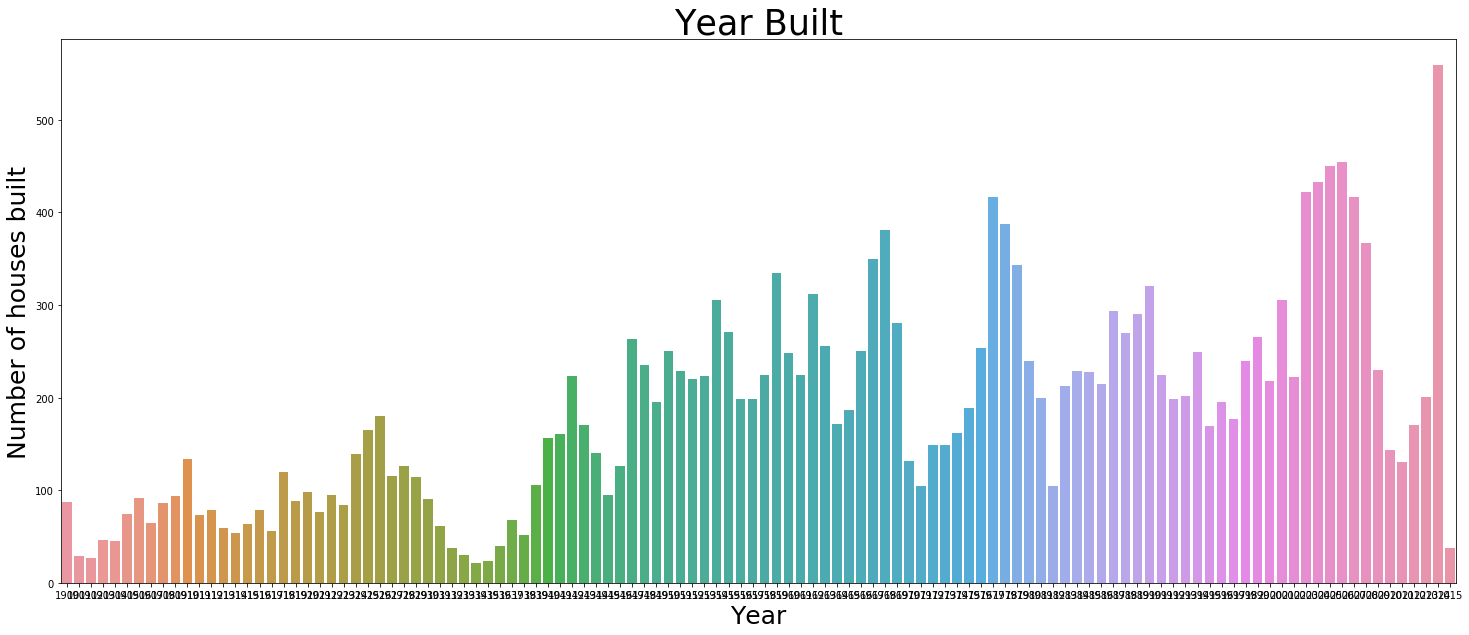

In [0]:
sns.countplot(df_house_data_reordered.yr_built)
fig = plt.gcf()
fig.set_size_inches(25, 10)
plt.xlabel('Year',fontsize = 25)
plt.ylabel('Number of houses built',fontsize = 25)
plt.title('Year Built',fontsize = 35)
plt.show()

plt.show()


Since the above plot gives the details that the maximum houses were built in last year 2014,   
lets dig more into plotting and segregate the plots based on years


15 years data can be seen on each row and the plots are continued on the next line


<Figure size 8400x5400 with 0 Axes>

C:\Users\nikhi\Anaconda4\lib\site-packages\matplotlib\font_manager.py:1241: UserWarning: findfont: Font family ['Arial Black'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))
C:\Users\nikhi\Anaconda4\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


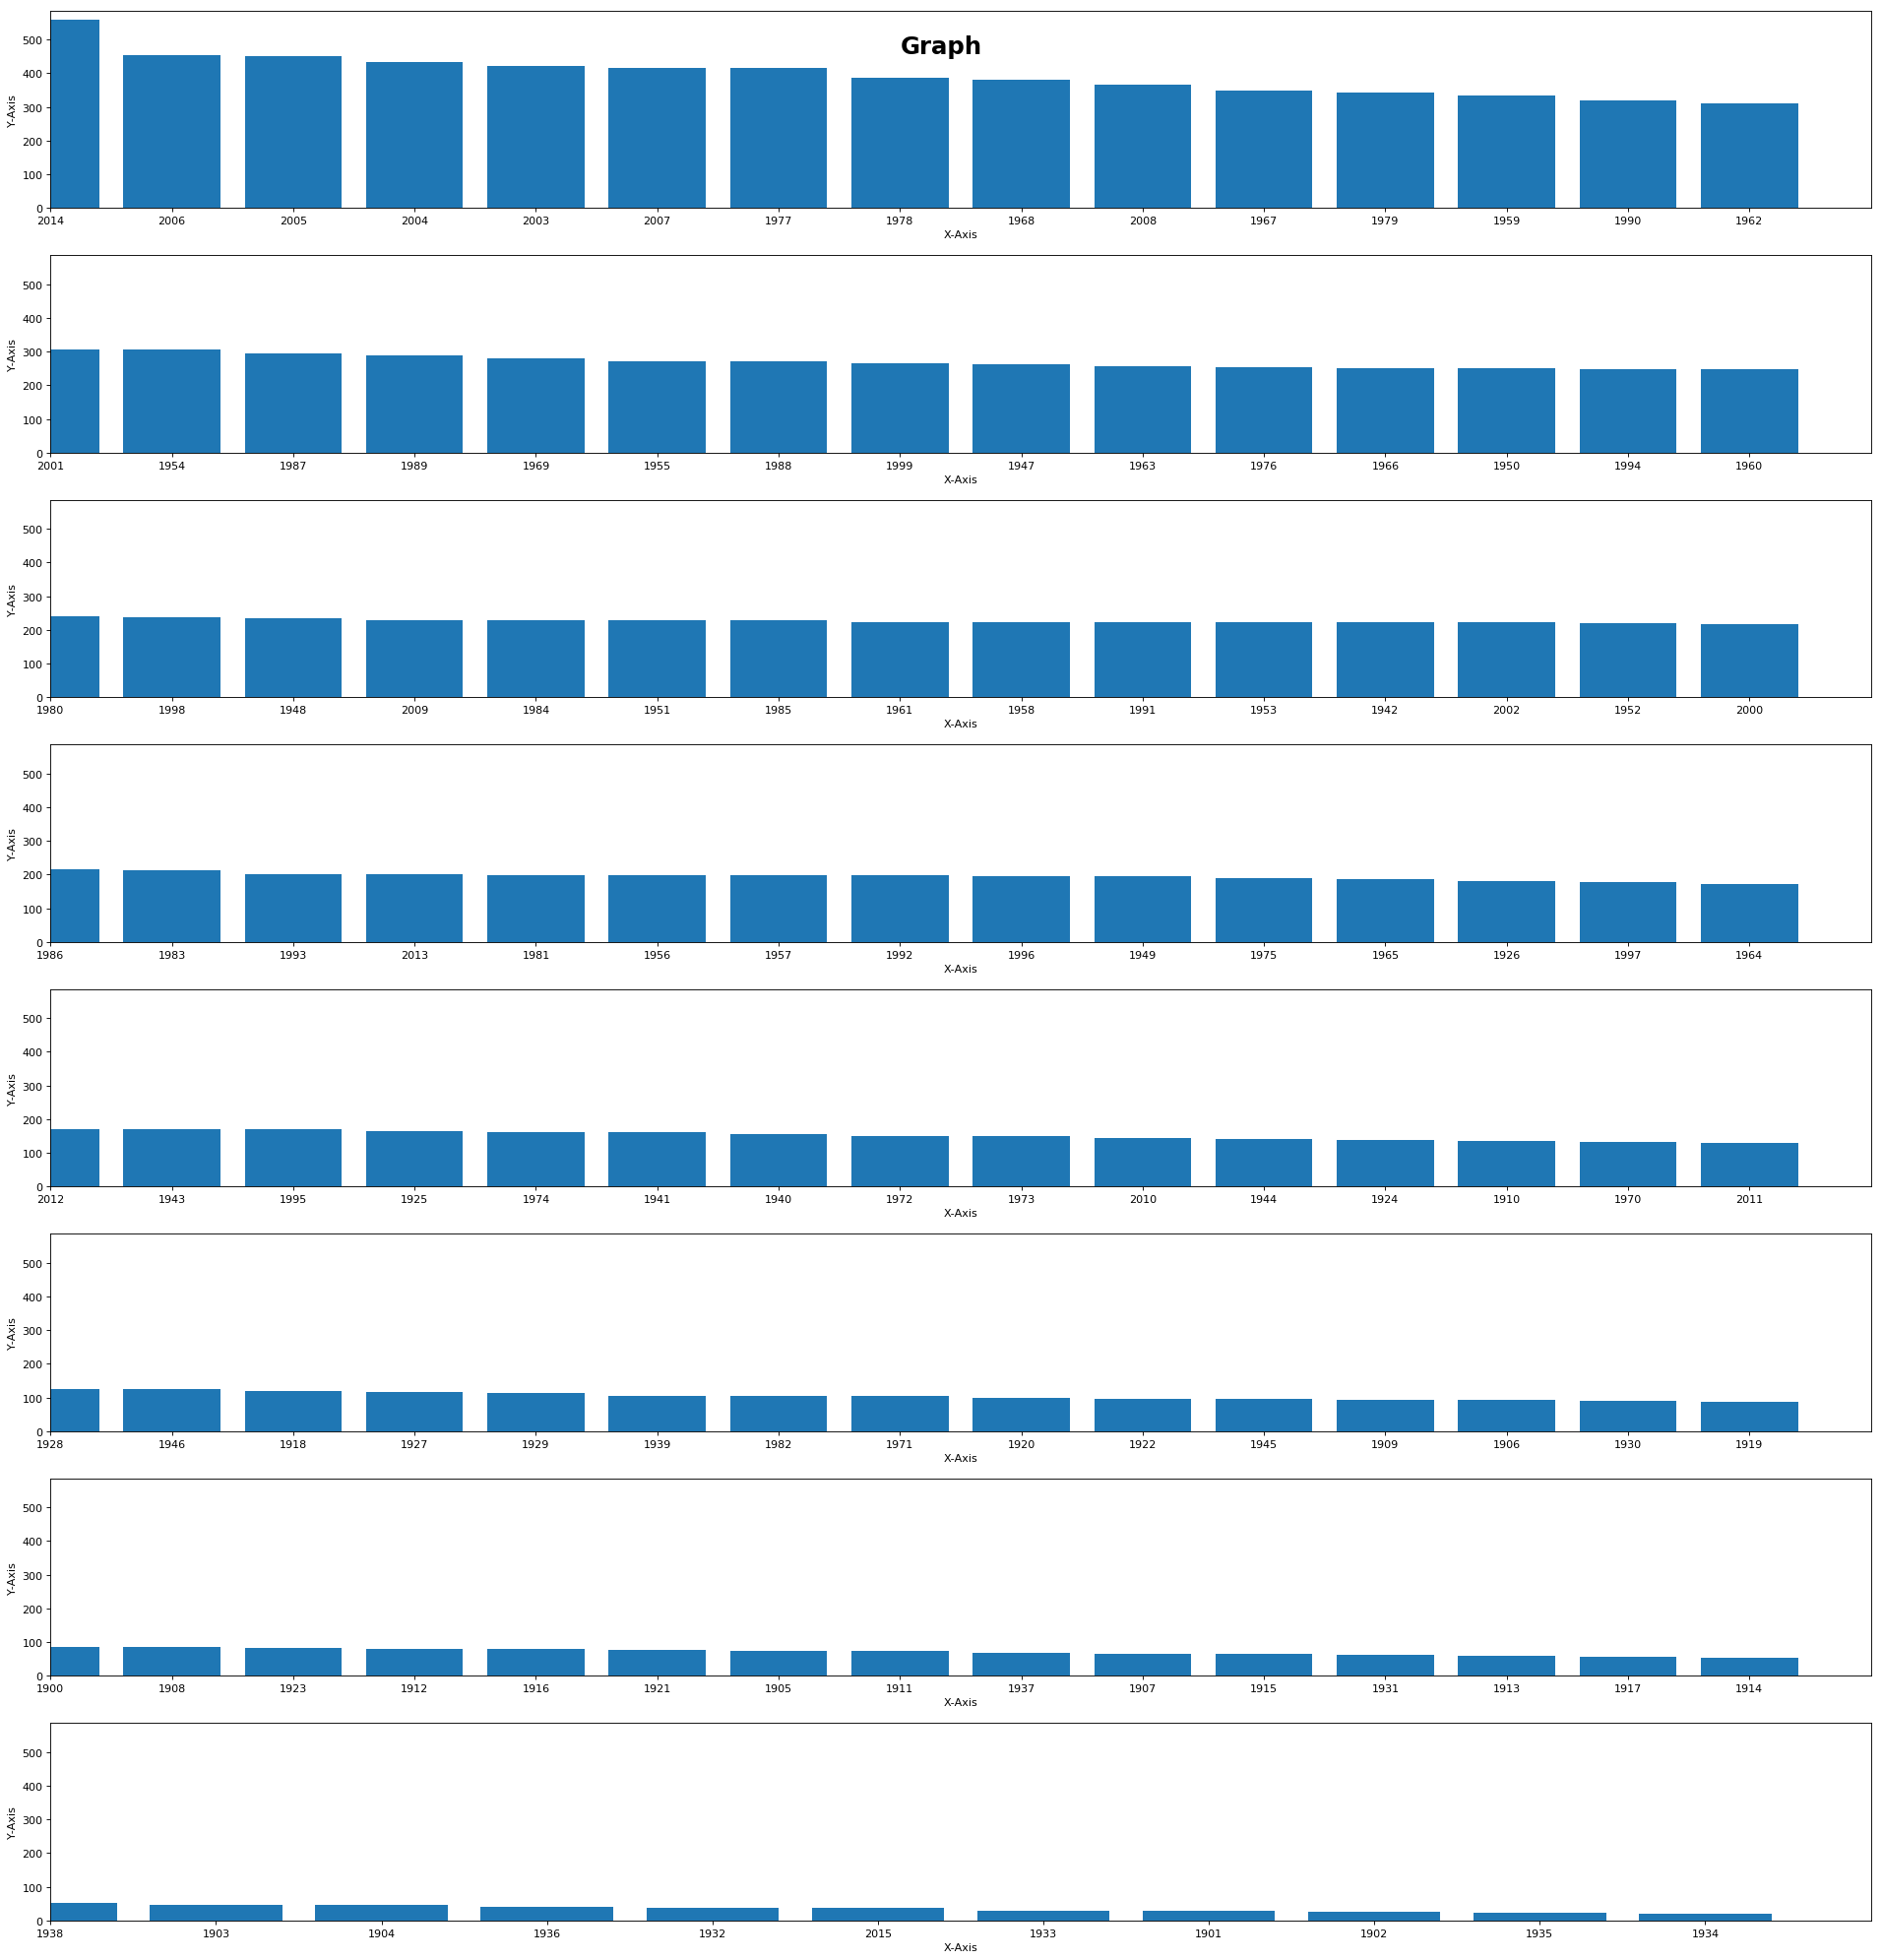

In [0]:
import pandas as pd
from matplotlib import rcParams
import matplotlib.pyplot as plt
from operator import itemgetter

rcParams.update({'figure.autolayout': True})
plt.figure(figsize=(14,9), dpi=600)


reso_names = df.index
reso_values = df.yr_built

N=15
sublists_names = [reso_names[x:x+N] for x in range(0, len(reso_names), N)]
sublists_values = [reso_values[x:x+N] for x in range(0, len(reso_values), N)]

size = int(len(reso_values))
fig, axs = plt.subplots(nrows=size//N+1, sharey=True, figsize=(24,25), dpi=80)

fig.suptitle('Graph', 
          **{'family': 'Arial Black', 'size': 22, 'weight': 'bold'})

for ax, names, values in zip(axs, sublists_names, sublists_values):
    ax.bar(range(len(values)), values, align='center')
    ax.set_xlabel('X-Axis')
    ax.set_ylabel('Y-Axis')
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(names, rotation='horizontal')
    ax.set_xlim(0, len(names))
fig.subplots_adjust(bottom=20, top=21)
plt.show()

     2)  Views per House

Lets check the number of views on each bedroom house

Below is the groupby view of each bedroom   


It can be seen that We have number of views for each bedroom below  
It says the count of each view for Bedroom 0 - 33

In [0]:
# df_groupby_view_bed_each = df_house_data_reordered.groupby(['View','bedrooms'])['bedrooms'].aggregate({'total_views': 'count'})
# df_groupby_view_bed_each

df_groupby_view_bed_each = df_house_data_reordered.groupby(['View','bedrooms'])['bedrooms'].count()
df_groupby_view_bed_each

View  bedrooms
1.0   0             11
      1            181
      2           2548
      3           9038
      4           6111
      5           1331
      6            218
      7             29
      8             12
      9              6
      10             2
      11             1
      12             1
2.0   1              2
      2             42
      3            120
      4            121
      5             41
      6              3
      7              3
3.0   0              2
      1              7
      2             97
      3            378
      4            332
      5            120
      6             22
      7              4
      10             1
4.0   1              3
      2             35
      3            183
      4            212
      5             61
      6             15
      8              1
5.0   1              6
      2             38
      3            105
      4            106
      5             48
      6             14
      7            

Maximum number of Views for each bedroom:

1st time -9038 views on 3 bedroom flat   
2nd time - 121 views on 4bedroom flat  
3rd time - 378 views on 3bedroom flat  
4th time - 212 views on 4bedroom flat  
5th time 106 views on 4 bedroom flat  

Text(0.5, 1.0, 'Views on Bedroom Plot')

C:\Users\nikhi\Anaconda4\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


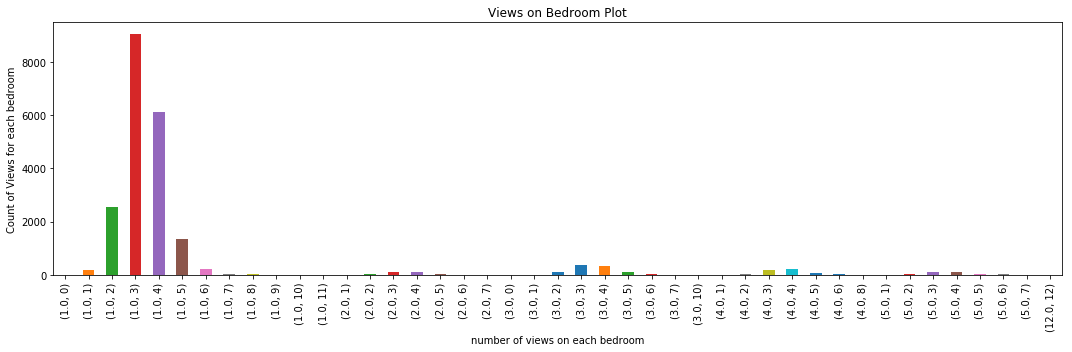

In [0]:
df_groupby_view_bed_each.plot(kind='bar',figsize=(15,5))
plt.xlabel('number of views on each bedroom')
plt.ylabel('Count of Views for each bedroom')
plt.title('Views on Bedroom Plot')

Lets plot the entire sum of views on each bedroom house

In [0]:
df_groupby_view_bed = df_house_data_reordered.groupby(['bedrooms'])['View'].sum()
df_groupby_view_bed

bedrooms
0        17.0
1       248.0
2      3253.0
3     11669.0
4      8727.0
5      2257.0
6       420.0
7        57.0
8        16.0
9         6.0
10        5.0
11        1.0
12       12.0
Name: View, dtype: float64

3 bedroom flats have been most widely viewed houses aas seen in the plot below:

C:\Users\nikhi\Anaconda4\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


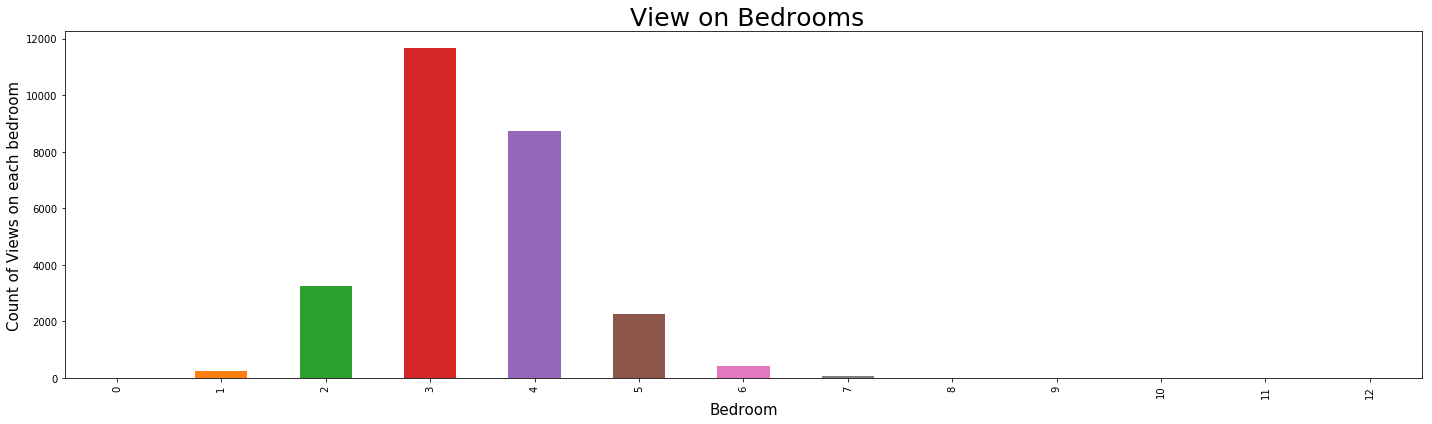

In [0]:
df_groupby_view_bed.plot(kind='bar', title='Variation corresponding to ratings',figsize=(20, 6))
plt.xlabel('Bedroom',fontsize = 15)
plt.ylabel('Count of Views on each bedroom',fontsize = 15)
plt.title(' View on Bedrooms',fontsize = 25)
plt.show()

        3) How good the Condition is for each house 
        The Condition column basically describes the condition in rank of 1- 5 of each house.  
        
        This plot explains the condition evaluated for each bedroom
        eg : Condition 1 count for each bedroom
             similarly for Condtion 2...
             
             We understand that Condition 3  has the maximum count of  6308 for 3 bedroom house
             

In [0]:
df_group_condition_bed = df_house_data_reordered.groupby(['Condition','bedrooms'])['bedrooms'].count()
df_group_condition_bed

Condition  bedrooms
1.0        0              1
           1              4
           2             12
           3              8
           4              4
           6              1
2.0        0              1
           1             11
           2             51
           3             69
           4             36
           5              1
           6              3
3.0        0             10
           1            124
           2           1779
           3           6308
           4           4580
           5           1031
           6            158
           7             25
           8              8
           9              6
           10             1
           11             1
4.0        0              1
           1             48
           2            718
           3           2711
           4           1682
           5            418
           6             87
           7              9
           8              3
           10             2


C:\Users\nikhi\Anaconda4\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


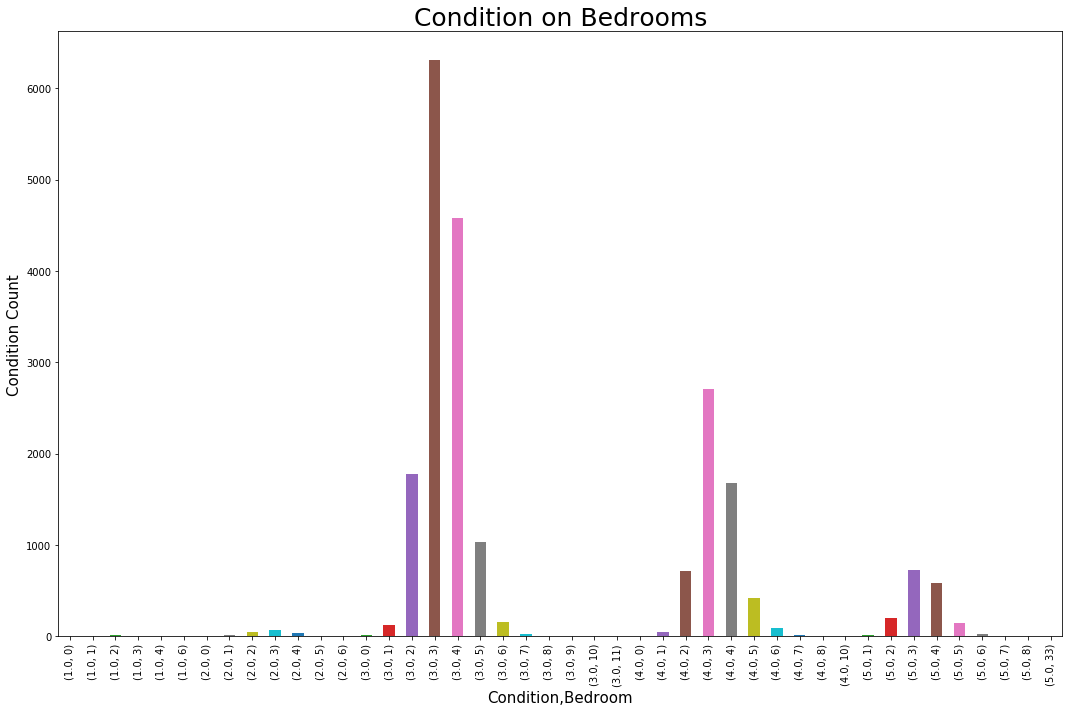

In [0]:
df_group_condition_bed.plot(kind='bar',figsize=(15,10))

plt.xlabel('Condition,Bedroom',fontsize = 15)
plt.ylabel('Condition Count',fontsize = 15)
plt.title('Condition on Bedrooms',fontsize = 25)
plt.show()

Lets Plot the maximum Condition ranking given for each bedroom

In [0]:
df_group_condition_bed1 = df_house_data_reordered.groupby(['bedrooms'])['Condition'].count().reset_index()
df_group_condition_bed1

,bedrooms,Condition
0,0,13
1,1,199
2,2,2760
3,3,9824
4,4,6882
5,5,1601
6,6,272
7,7,38
8,8,13
9,9,6


It shows that the condition of 3 bedrooms houses is best as per the ranking

C:\Users\nikhi\Anaconda4\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


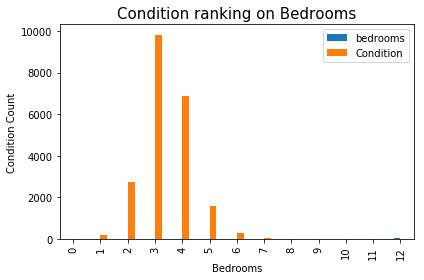

In [0]:
df_group_condition_bed1.plot(kind='bar')
plt.xlabel('Bedrooms',fontsize = 10)
plt.ylabel('Condition Count')
plt.title('Condition ranking on Bedrooms',fontsize = 15)
plt.show()

    4) How good the Grade is for each house 
        The Grading column basically describes the overall grade given to the housing unit, 
        based on King County grading   system 
                  
             We understand that bedroom 3 has the maximum count of  9824 

In [0]:
df_group_grade_bed = df_house_data_reordered.groupby(['bedrooms'])['Grade'].count()
df_group_grade_bed

bedrooms
0       13
1      199
2     2760
3     9824
4     6882
5     1601
6      272
7       38
8       13
9        6
10       3
11       1
33       1
Name: Grade, dtype: int64

C:\Users\nikhi\Anaconda4\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


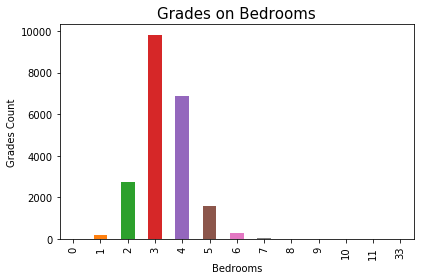

In [0]:
df_group_grade_bed.plot(kind='bar')
plt.xlabel('Bedrooms',fontsize = 10)
plt.ylabel('Grades Count')
plt.title('Grades on Bedrooms',fontsize = 15)
plt.show()

5) Bedroom - Waterfall & Basement

In [0]:
df_groupby_bed_water_base = df_house_data_reordered.groupby(['bedrooms','waterfront','basement_present'])['bedrooms'].count()

Below output indicates waterfront and basement count for each bedrooms from 1 - 33

In [0]:
df_groupby_bed_water_base

bedrooms  waterfront  basement_present
0         0           0                     13
1         0           0                    164
                      1                     30
          1           0                      4
                      1                      1
2         0           0                   1931
                      1                    798
          1           0                     18
                      1                     13
3         0           0                   6234
                      1                   3526
          1           0                     26
                      1                     38
4         0           0                   4004
                      1                   2838
          1           0                      8
                      1                     32
5         0           0                    612
                      1                    970
          1           0                      8
                     

The graph shows that Bedroom 3 is the maximum bedroom with no waterfront and basement area

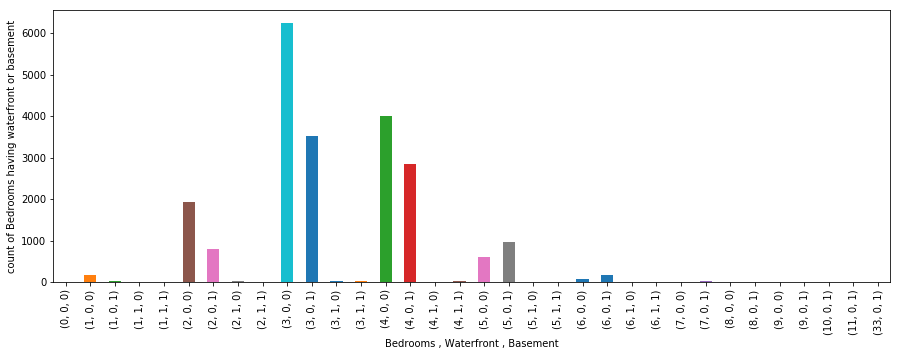

In [0]:
df_groupby_bed_water_base.plot(kind='bar',figsize=(15,5))
plt.xlabel("Bedrooms , Waterfront , Basement")
plt.ylabel('count of Bedrooms having waterfront or basement')
plt.show()

Function to check the effect of Waterfront and Basement on prices for each house

In [0]:
def water_basement(val1,val2):
    df =df_house_data_reordered[(df_house_data_reordered.waterfront == val1) & (df_house_data_reordered.basement_present == val2)].reset_index()
    df.bedrooms.value_counts().plot(kind='bar',figsize=(15,5))
    plt.xlabel("Bedrooms")
    plt.ylabel("Count of each bedroom for Waterfront and Basement")
    plt.title("Plot for Bed vs Count of Waterfront and Basement",fontsize =25)
    plt.show()
    key = df.bedrooms.unique()
    dicti_min = {}
    dicti_max = {}
    for i in key:
        price_min = df.price[df.bedrooms == i].min()
        price_max = df.price[df.bedrooms == i].max()
        dicti_min[i] = price_min
        dicti_max[i] = price_max
    return dicti_min , dicti_max


Check the minimum and maximum price for each room depending on the waterfront and basement presence or absence

In [0]:
def min_max_price(dict_a,dict_b):
    dict3 = defaultdict(list)
    for key, val in chain(dict_a.items(), dict_b.items()):
        dict3[key].append(val)
    df_tp = pd.DataFrame.from_dict(dict3,orient='index',columns=['Mimimum Price','Maximum Price'])
    df_tp.plot(kind = 'bar')
    plt.title("Prices of each Bedroom w.r.t Waterfront or Basement",fontsize =25)
    plt.xlabel("Bedrooms",fontsize =15)
    plt.ylabel("Prices",fontsize =15)
    plt.show()

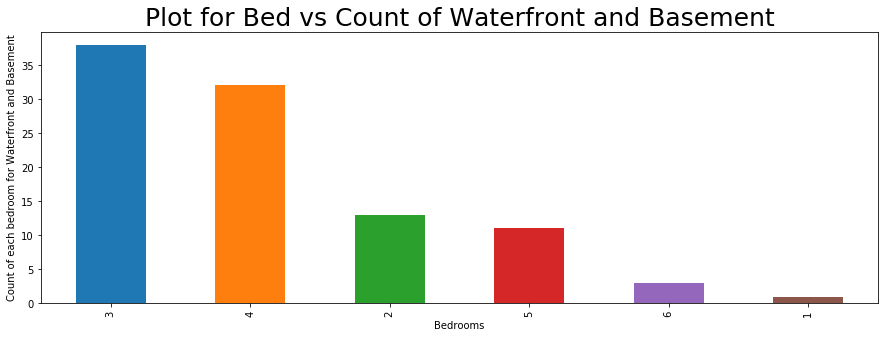

Bedroom Prices for Waterfront and Basement present


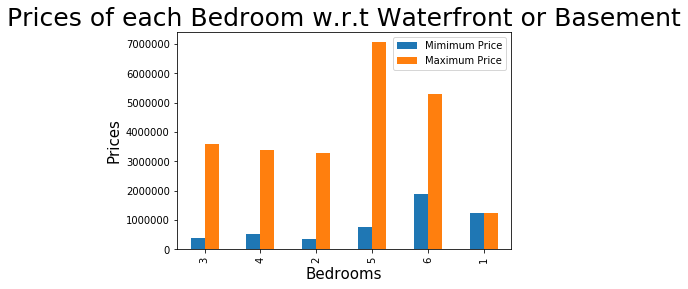

In [0]:
dic_a , dic_b = water_basement(1,1)
print("Bedroom Prices for Waterfront and Basement present")
min_max_price(dic_a , dic_b)


No Waterfront and Basement


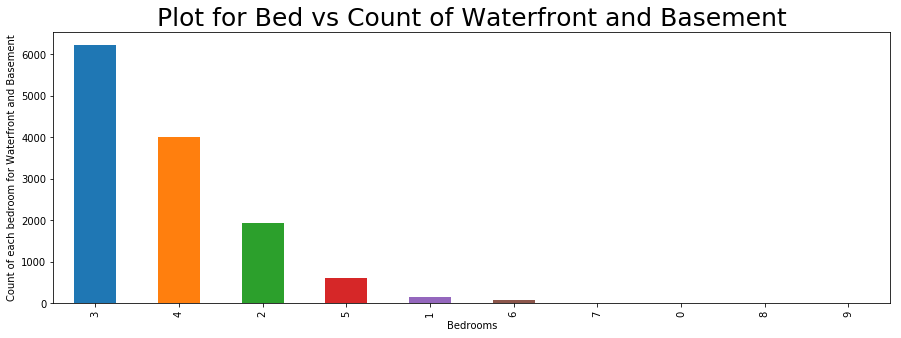

Bedroom Prices for no Waterfront and Basement


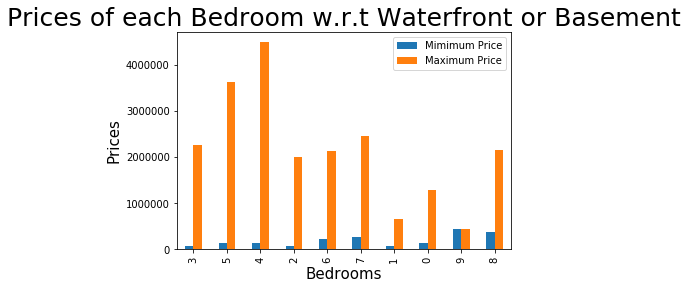

In [0]:
print("No Waterfront and Basement")
dic0_a , dic0_b = water_basement(0,0)
print("Bedroom Prices for no Waterfront and Basement")
min_max_price(dic0_a , dic0_b)

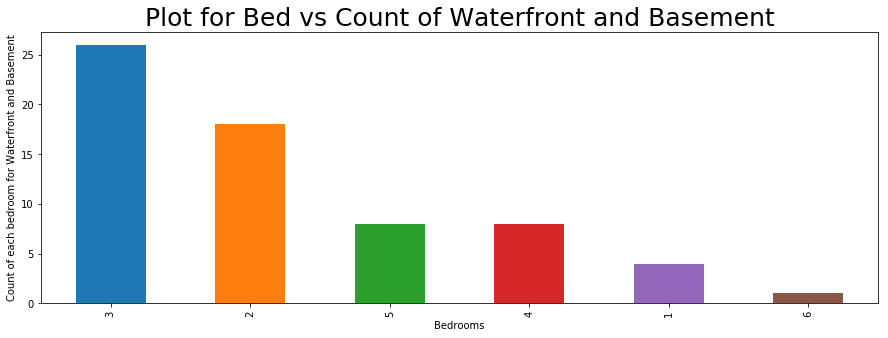

Bedroom Prices for Waterfront present and Basement absent


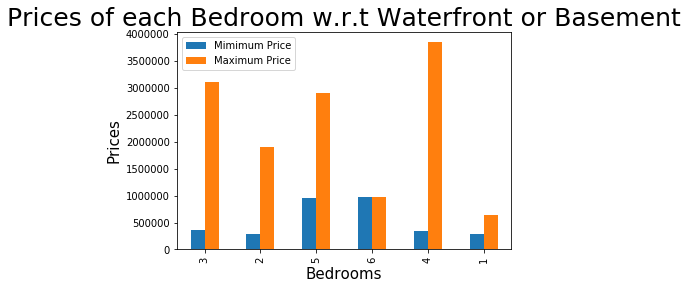

In [0]:
print("Waterfront Present and Basement Absent")
dict_1 , dict_0 = water_basement(1,0)
print("Bedroom Prices for Waterfront present and Basement absent")
min_max_price(dict_1 , dict_0)

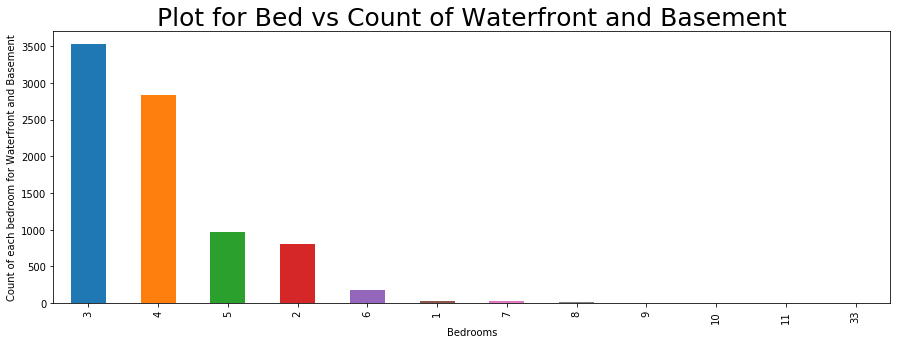

Bedroom Prices for Waterfront absent and Basement present


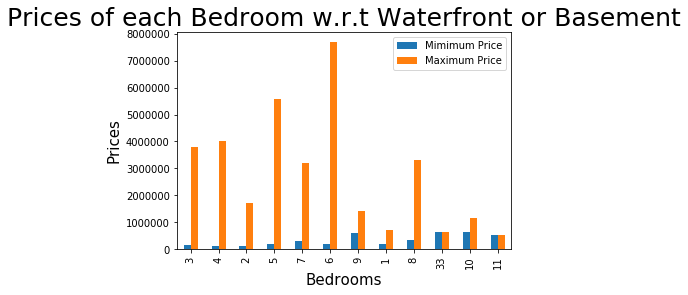

In [0]:
dict_00 , dict_01 = water_basement(0,1)
print("Bedroom Prices for Waterfront absent and Basement present")
min_max_price(dict_00 , dict_01)

It can be seen from the above plots :

   
  1) Waterfront and Basement Present -- Maximum in bedrooms 3   
       Minimum Price range Bedroom : Bedrrom 3  
       Maximum price range Bedroom:  Bedrrom 5   
       
  2) Waterfront and Basement Absent --- Maximum in bedrooms 3   
       Minimum Price range Bedroom :  Bedroom 3   
       Maximum price range Bedroom:   Bedroom 4   
              
  3) Waterfront pressent and Basement Absent---   Maximum in bedrooms 3   
       Minimum Price range Bedroom : Bedroom 3   
       Maximum price range Bedroom:   Bedroom 4   
       
  4) Waterfront Absent and Basement Present ---   Maximum in bedrooms 3   
        Minimum Price range Bedroom : Bedroom 3   
       Maximum price range Bedroom:   Bedroom 6	  

The presence /absence of  Waterfront or Basement doesnot have nay effect on price of house

5) Lets see the  overall Price ranges for each bedroom

In [0]:
print(df_house_data_reordered['price'].min())
print(df_house_data_reordered['price'].max())

75000
7700000


In [0]:
one_bed_price = df_house_data_reordered.price[(df_house_data_reordered.bedrooms ==1)]
two_bed_price = df_house_data_reordered.price[(df_house_data_reordered.bedrooms ==2)]
three_bed_price = df_house_data_reordered.price[(df_house_data_reordered.bedrooms ==3)]
four_bed_price = df_house_data_reordered.price[(df_house_data_reordered.bedrooms ==4)]
five_bed_price = df_house_data_reordered.price[(df_house_data_reordered.bedrooms ==5)]
six_bed_price = df_house_data_reordered.price[(df_house_data_reordered.bedrooms ==6)]
seven_bed_price = df_house_data_reordered.price[(df_house_data_reordered.bedrooms ==7)]
eight_bed_price = df_house_data_reordered.price[(df_house_data_reordered.bedrooms ==8)]
nine_bed_price = df_house_data_reordered.price[(df_house_data_reordered.bedrooms ==9)]
ten_bed_price = df_house_data_reordered.price[(df_house_data_reordered.bedrooms ==10)]
elev_bed_price = df_house_data_reordered.price[(df_house_data_reordered.bedrooms ==11)]    
thirtythr_bed_price = df_house_data_reordered.price[(df_house_data_reordered.bedrooms ==33)]
# one_bed_price
print("Range of 1 bedroom price is", one_bed_price.min() ,  "-" ,one_bed_price.max()  )
print("Range of 2 bedroom price is", two_bed_price.min() ,  "-" ,two_bed_price.max()  )
print("Range of 3 bedroom price is", three_bed_price.min() , "-" ,three_bed_price.max()  )
print("Range of 4 bedroom price is", four_bed_price.min() ,  "-" ,four_bed_price.max()  )
print("Range of 5 bedroom price is", five_bed_price.min() ,  "-" ,five_bed_price.max()  )
print("Range of 6 bedroom price is", six_bed_price.min() ,  "-" ,six_bed_price.max()  )
print("Range of 7 bedroom price is", seven_bed_price.min() , "-" ,seven_bed_price.max()  )
print("Range of 8 bedroom price is", eight_bed_price.min() , "-" ,eight_bed_price.max()  )
print("Range of 9 bedroom price is", nine_bed_price.min() ,  "-" ,nine_bed_price.max()  )
print("Range of 10 bedroom price is", ten_bed_price.min() ,  "-" ,ten_bed_price.max()  )
print("Range of 11 bedroom price is", elev_bed_price.min() ,  "-" ,elev_bed_price.max()  )
print("Range of 33 bedroom price is", thirtythr_bed_price.min() , "-" ,thirtythr_bed_price.max()  )

Range of 1 bedroom price is 75000 - 1247000
Range of 2 bedroom price is 78000 - 3278000
Range of 3 bedroom price is 82000 - 3800000
Range of 4 bedroom price is 100000 - 4489000
Range of 5 bedroom price is 133000 - 7062500
Range of 6 bedroom price is 175000 - 7700000
Range of 7 bedroom price is 280000 - 3200000
Range of 8 bedroom price is 340000 - 3300000
Range of 9 bedroom price is 450000 - 1400000
Range of 10 bedroom price is 650000 - 1148000
Range of 11 bedroom price is 520000 - 520000
Range of 33 bedroom price is 640000 - 640000


Min-Max range for Bedrooms 3 is [82000, 3800000]
Min-Max range for Bedrooms 5 is [133000, 7062500]
Min-Max range for Bedrooms 4 is [100000, 4489000]
Min-Max range for Bedrooms 2 is [78000, 3278000]
Min-Max range for Bedrooms 7 is [280000, 3200000]
Min-Max range for Bedrooms 6 is [175000, 7700000]
Min-Max range for Bedrooms 9 is [450000, 1400000]
Min-Max range for Bedrooms 1 is [75000, 1247000]
Min-Max range for Bedrooms 8 is [340000, 3300000]
Min-Max range for Bedrooms 0 is [139950, 1295650]
Min-Max range for Bedrooms 12 is [640000, 640000]
Min-Max range for Bedrooms 10 is [650000, 1148000]
Min-Max range for Bedrooms 11 is [520000, 520000]


C:\Users\nikhi\Anaconda4\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


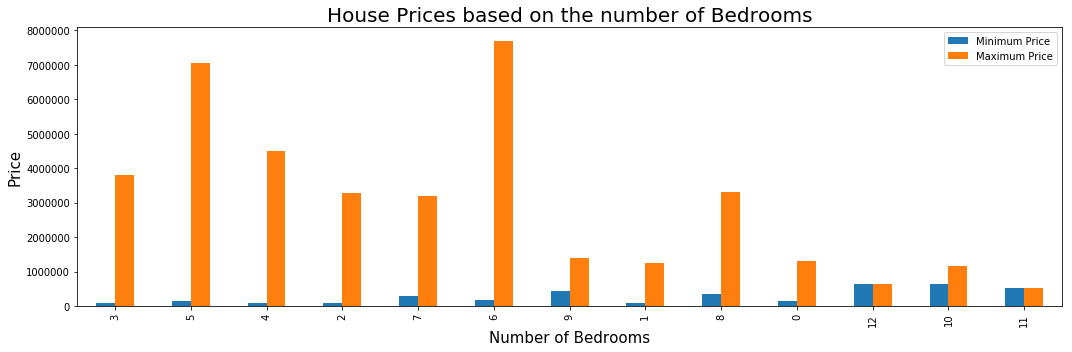

In [0]:
dict_min_prices = {}
dict_max_prices = {}
dic = defaultdict(list)
uni = df_house_data_reordered.bedrooms.unique()
for i in uni:
    price = df_house_data_reordered.price[(df_house_data_reordered.bedrooms ==i)]
    dict_min_prices[i] = price.min()
    dict_max_prices[i] = price.max()

for key , val in  chain(dict_min_prices.items() ,dict_max_prices.items() ):
    dic[key].append(val)

for keys,values in dic.items():
    print("Min-Max range for Bedrooms" ,keys , "is" , values )
df_prices_bedrooms = pd.DataFrame.from_dict(dic, orient='index',columns=['Minimum Price','Maximum Price']).plot(kind='bar',figsize=(15,5))
plt.title('House Prices based on the number of Bedrooms',fontsize=20)
plt.xlabel('Number of Bedrooms',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

  6) Does the year in which the house is built has  any influence on House Prices?

In [0]:
yr_uni = df_house_data_reordered.yr_built.unique()
bed_uni = df_house_data_reordered.bedrooms.unique()

In [0]:
df_tmp = []
for yr in yr_uni:
    for bed in bed_uni:
        df_price =pd.DataFrame(columns=['year the bedroom was built','Number of bedrooms'],index=[0])
        df_bed_yr = df_house_data_reordered[(df_house_data_reordered.yr_built == yr) & (df_house_data_reordered.bedrooms == bed)]
        df_price['year the bedroom was built'] = yr
        df_price['Number of bedrooms'] = bed
        df_price['Average'] = df_bed_yr['price'].mean()
        df_tmp.append(df_price)
df_final = pd.concat(df_tmp,ignore_index=True)

In [0]:
df_price_allyrs = round(df_final)
df_price_allyrs = df_price_allyrs.dropna()
df_price_allyrs.sort_values('year the bedroom was built')
df_few_yrs = df_price_allyrs[0:40]

In [0]:
# df_few_yrs.head()

In [0]:
# df_few_yrs_group.to_csv("C:\\Users\\nikhi\\data\\avg_price.csv")

Inferrence from the graph I and II:   
    There is a decrease in price values of houses even though the avergae bedrooms building is high  
        It can be said that when the avergae number of bedrooms are increasing the prices fall down and   
        the prices increases when the average number of houses decreases.  
        This can be observed from year 1947-1971(Graph I and II)   

C:\Users\nikhi\Anaconda4\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


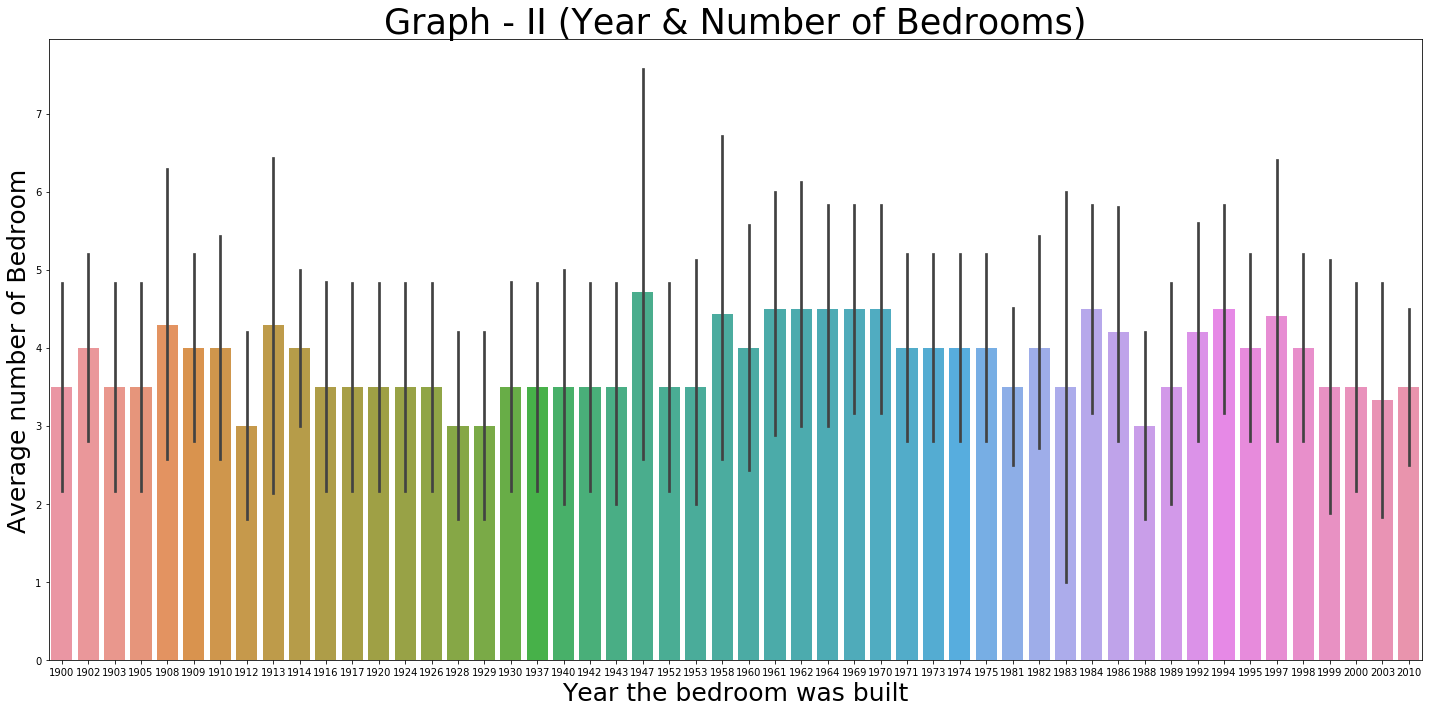

In [0]:
sns.barplot(x="year the bedroom was built",y="Number of bedrooms",data=df_price_allyrs[250:550])
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.xlabel("Year the bedroom was built",fontsize=25)
plt.ylabel("Average number of Bedroom",fontsize=25)
plt.title("Graph - II (Year & Number of Bedrooms)" , fontsize=35)
plt.show()

C:\Users\nikhi\Anaconda4\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


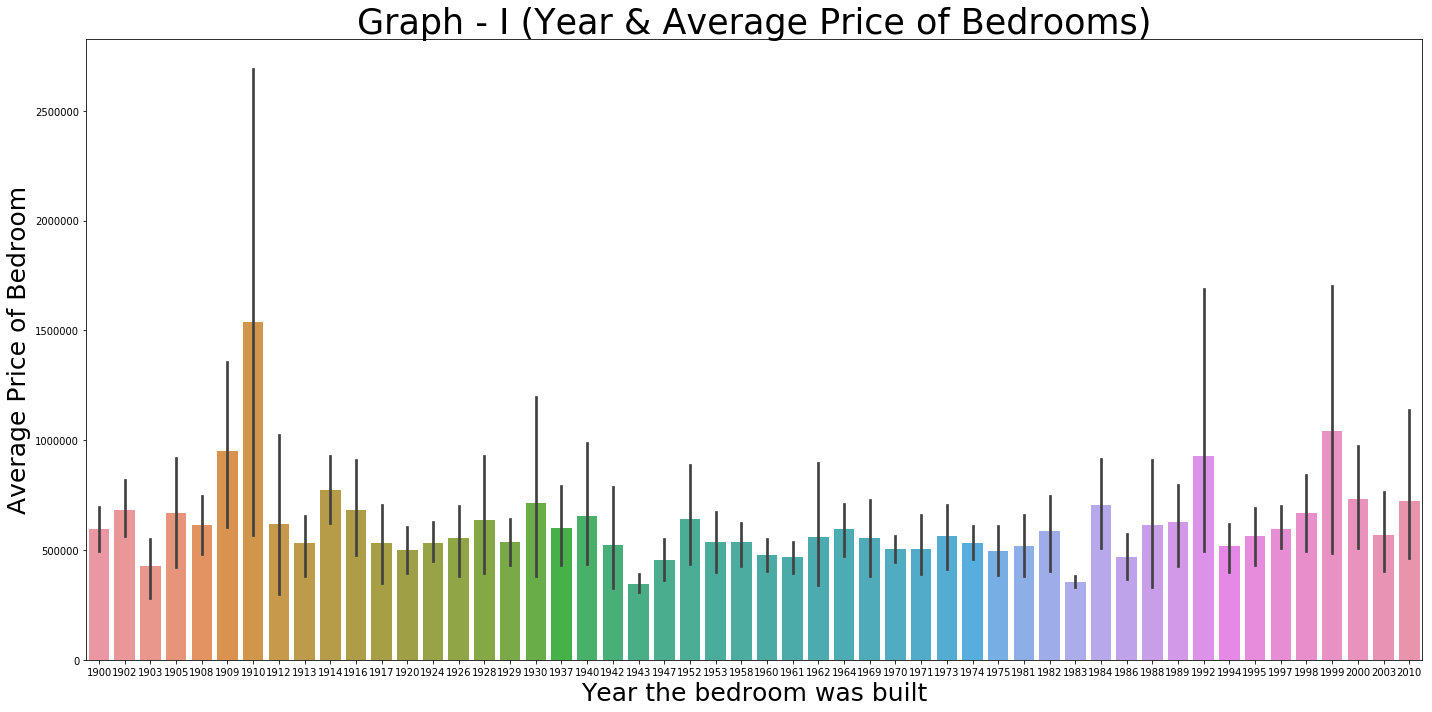

In [0]:
sns.barplot(x="year the bedroom was built",y="Average",data=df_price_allyrs[250:550])
fig = plt.gcf()
fig.set_size_inches(20, 10)
plt.xlabel("Year the bedroom was built",fontsize=25)
plt.ylabel("Average Price of Bedroom",fontsize=25)
plt.title("Graph - I (Year & Average Price of Bedrooms)" , fontsize=35)
plt.show()

   7) Is Zip code affecting the prices ?

In [0]:
zip_uni = df_house_data_reordered.ZipCode.unique()
zip_uni


array([0, '98004', '98102', '98112', '98039', '98109'], dtype=object)

In [0]:
df_avg_price = pd.DataFrame(columns = ["Average Price"],index=[0])
df_tmp1 = []
dic_pr = {}
for zip1 in zip_uni:
    avg_price = df_house_data_reordered.price[(df_house_data_reordered.ZipCode == zip1)]
    dic_pr[zip1] = avg_price.mean()
df_fr = pd.DataFrame.from_dict(dic_pr,orient='index' ,columns=['avg'])
df_fr

,avg
0,539972.336427
98004,556231.117021
98102,535040.466667
98112,536410.977695
98039,583521.460000
98109,514433.990826


It can be seen that the Zipcode 98039 has the maximum price of House

C:\Users\nikhi\Anaconda4\lib\site-packages\matplotlib\figure.py:2366: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  warnings.warn("This figure includes Axes that are not compatible "


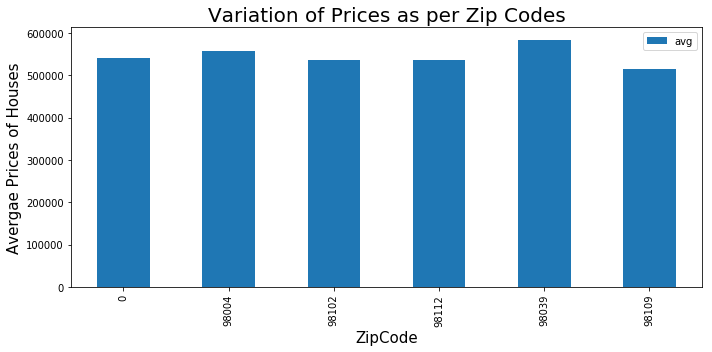

In [0]:
df_fr.plot(kind='bar',figsize=(10,5))
plt.xlabel('ZipCode',fontsize=15)
plt.ylabel('Avergae Prices of Houses',fontsize=15)
plt.title("Variation of Prices as per Zip Codes",fontsize=20)
plt.show()

#Part 3 : Feature Selection

Since we have 20 independent variables , all the variables may or may not have relation with 
the price .

Feature selection will help us understand the important features relavant to target variable : 
  
**1.  Pair Plot**    
  
    

In [0]:
cols = df_house_data_reordered[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'View', 'Grade', 'Condition', 'Floor', 'ZipCode']]
features = cols.as_matrix()

target = df_house_data_reordered.price.values

In [0]:
train_features,test_features,train_target,test_target = train_test_split(features,target,test_size=0.3,random_state=42)

Lets plot the pair plot and check the relationship of each variable with target Price

Floor , condition,view,renovated,yr built,waterfront have no relationship ,hence we remove these features from further processing

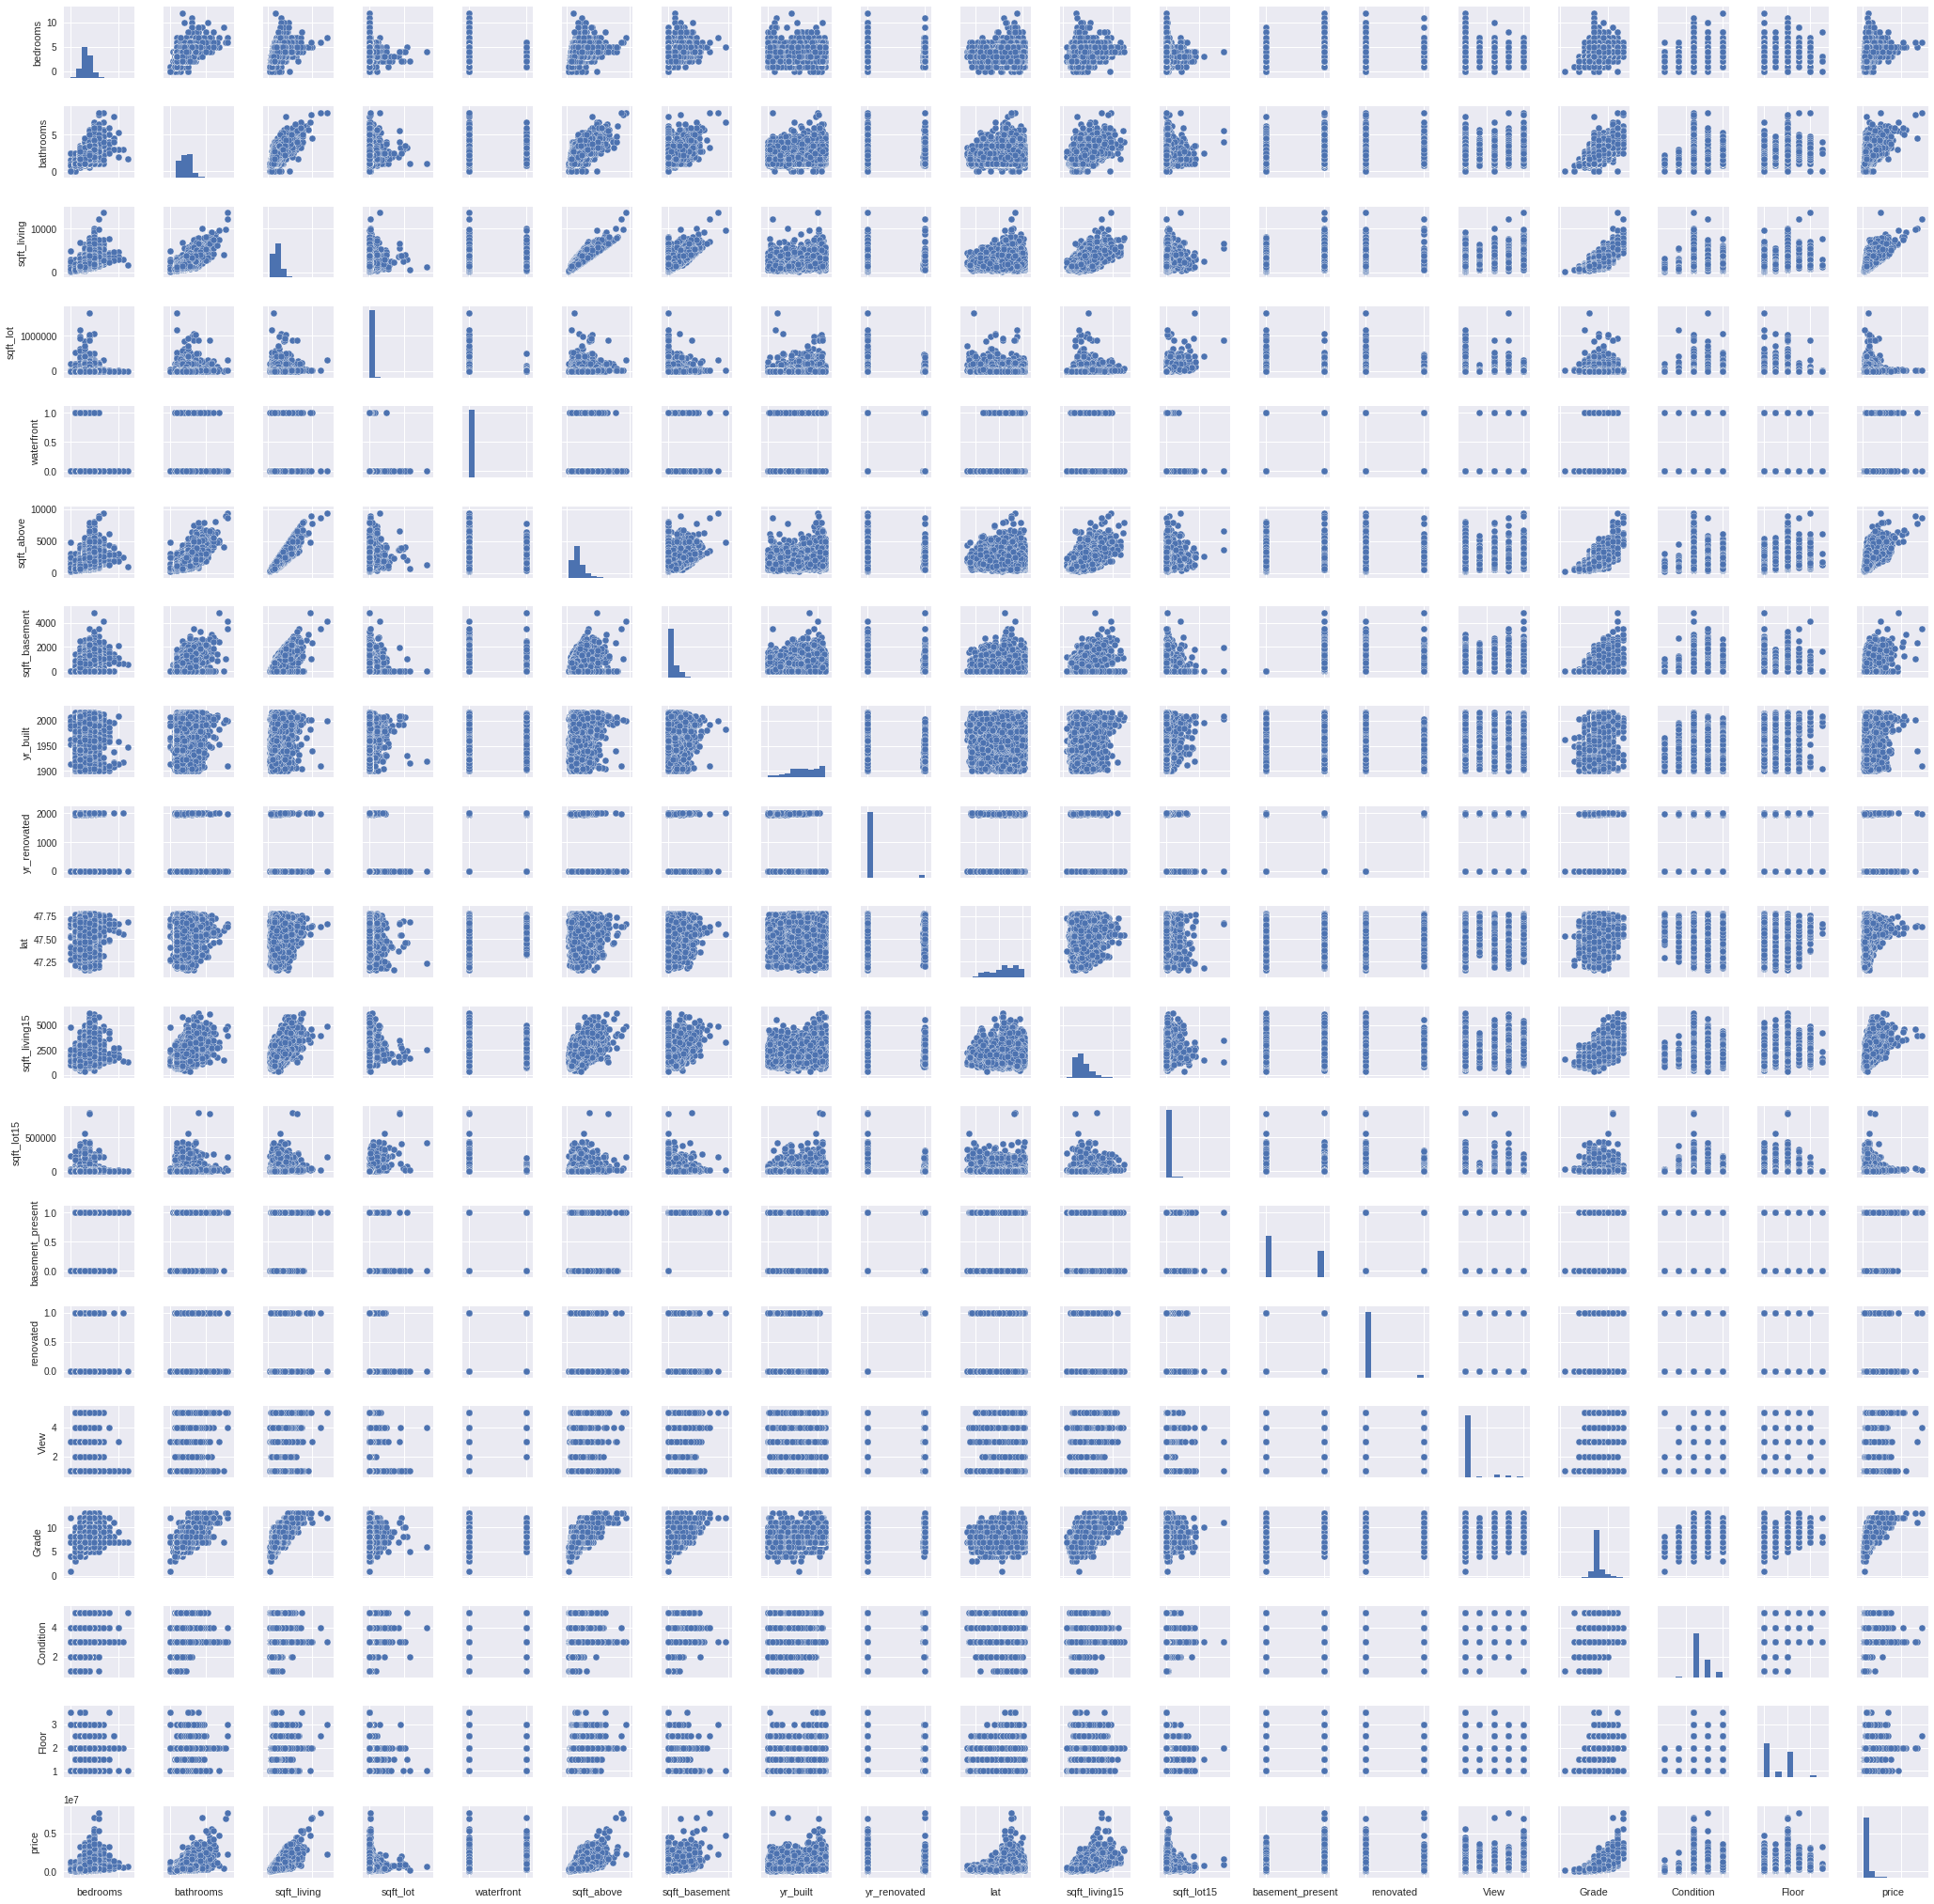

In [0]:
with sns.plotting_context("notebook",font_scale=1):
    g = sns.pairplot(df_house_data_reordered[['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'View', 'Grade', 'Condition', 'Floor','price']], 
                 palette='tab20',size=1.5)
g.set(xticklabels=[]);



**2. Mutual Infor Regression ** :

It gives the probability of importance for each variable , I have considered the variables having importance of more than 0.3

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by the scale function.
  warnings.warn(msg, DataConversionWarning)


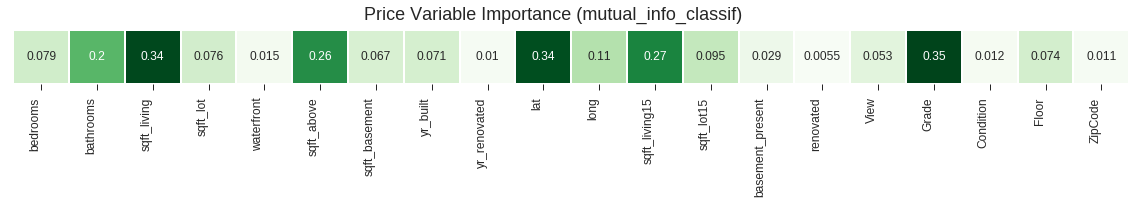

In [0]:
from sklearn.feature_selection import mutual_info_regression
data_important_feat_1 = mutual_info_regression(train_features, train_target)

plt.subplots(1, figsize=(20, 1))
sns.heatmap(data_important_feat_1[:, np.newaxis].T, cmap='Greens', 
            cbar=False, linewidths=1, annot=True)
plt.yticks([], [])
plt.gca().set_xticklabels(df_house_data_reordered.columns[1:], rotation=90, 
                          ha='right', 
                          fontsize=12)
plt.suptitle("Price Variable Importance (mutual_info_classif)", fontsize=18,
             y=1.2)
plt.gcf().subplots_adjust(wspace=0.2)

**3.SelectFromModel **

Meta-transformer for selecting features based on importance weights.

In [0]:
df_features = df_house_data_reordered.iloc[:,1:21]
df_features.shape

(21613, 20)

In [0]:
model = SelectFromModel(rf, threshold='median')
data_important_feat_2 = model.fit_transform(train_features, train_target)
feature_idx = model.get_support()
# feature_idx
feature_name = df_features.columns[feature_idx]
feature_name

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Index(['sqft_living', 'sqft_lot', 'waterfront', 'sqft_above', 'yr_built',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'Grade'],
      dtype='object')

**4.HeatMap**

This technique gives the correlation along with the probability of each variable with the other variable



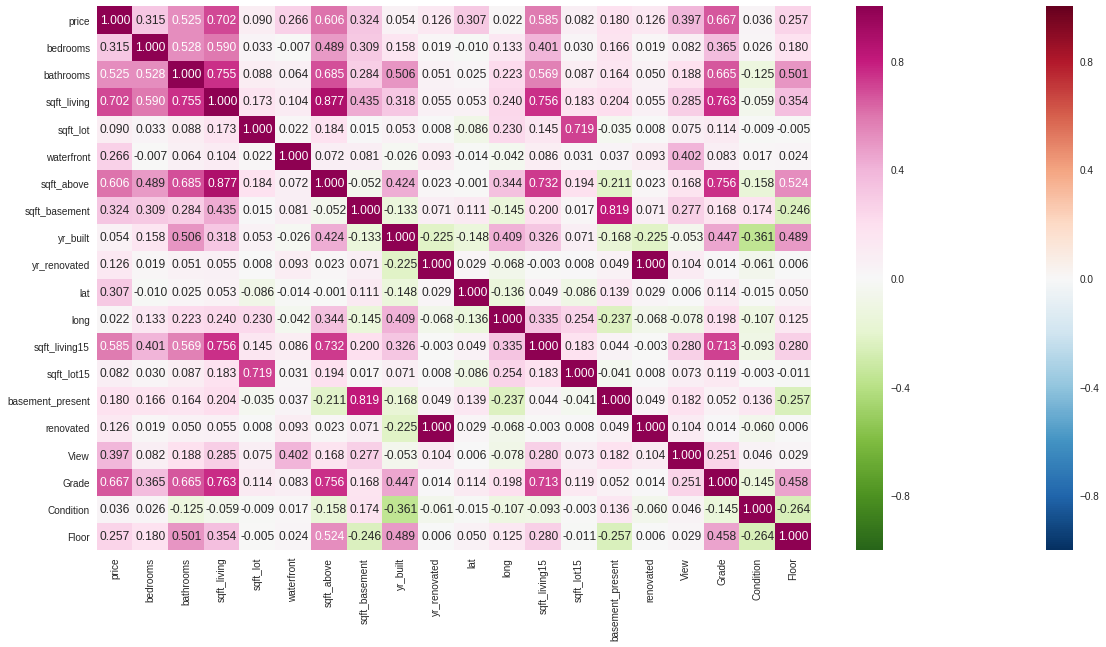

In [0]:
correlation = df_house_data_reordered.corr()

plt.figure(figsize = (20, 10))

sns.heatmap(correlation)



sns.heatmap(correlation, annot = True, vmin = -1, vmax = 1, fmt = '.3f', 
            cmap=plt.cm.PiYG_r);

The features having  probabilites of more then 0.4 are considered  and we again plot the heat map and Pairplot to see the relationship

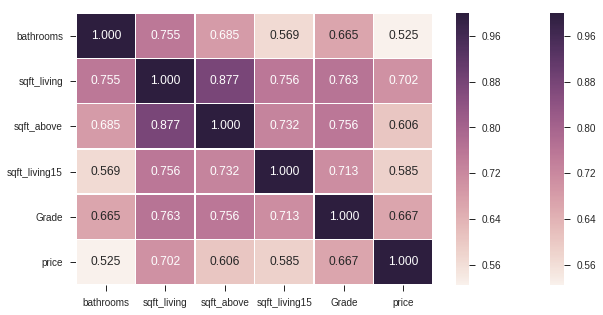

In [0]:
correlation_selected_feat = df_house_data_reordered[['bathrooms', 'sqft_living','sqft_above', 'sqft_living15', 'Grade','price']].corr()
plt.figure(figsize = (10, 5))
sns.heatmap(correlation_selected_feat)
sns.heatmap(correlation_selected_feat, annot = True, fmt = '.3f', linewidths=0.5);
# features1_corr

From PairPlot we can see there is a strong linear relationship between Sqft_living & Sqt_above with the price

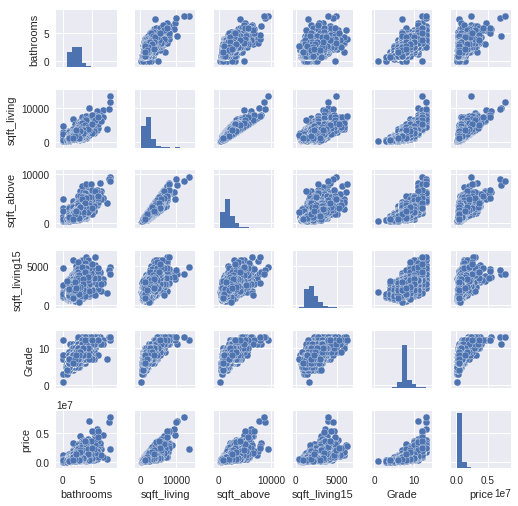

In [0]:
sns.set()
cols = ['bathrooms', 'sqft_living','sqft_above', 'sqft_living15', 'Grade','price']
sns.pairplot(df_house_data_reordered[cols], size = 1.2)
plt.show();

**Results for Feature selection from 4 techniques:**       
**Pairplot**: there exists a linear relationship for the below features  
•	Sq Living  
•	Grade  
•	sq above  
•	Bathrooms
 
**SelectFromModel** the features having probabilty of more then 0.2 are   
•	Sqr_living  
•	lat  
•	sq_liv15  
•	Grade  
•	bathrooms  
•	Sq_above   

**Heatmap** : the probabilites of features more then 0.4 are considered  
•	bathrooms  
•	sq_living  
•	sq_abovw  
•	sq_liv15  
•	Grade 
  
**SelectModel:  **     
•	sqft_living   
•	sqft_lot  
•	waterfront  
•	sqft_above  
•	yr_built  
•	lat  
•	long  
•	sqft_living15  
•	'sqft_lot15 
•	Grade 



**Important Independent features selected for further processing from the above evaluation:**  

*   sq_living
*   bathrooms
*   sq_abovw
*   sq_liv15
*   Grade





#**Part 4: Data Modelling**

We will model the data using Regression and Classification techniques along
with hyper parameter tunning

**Regression** **Techniques**


Lets evaluate Regression models through
Models :  
    1)Random Forest Regression  
    2)XGBoost Regression  
    3)Linear Regression  
    4)KNN  
    

In [0]:
df_house_data_reordered.columns

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'waterfront', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'basement_present',
       'renovated', 'View', 'Grade', 'Condition', 'Floor', 'ZipCode'],
      dtype='object')

In [0]:
new_cols = df_house_data_reordered[['sqft_living','sqft_above', 
                                    'sqft_living15', 'Grade']]
features1 = new_cols.as_matrix()

target1 = df_house_data_reordered.price.values

In [0]:
train_features_new,test_features_new,train_target_new,test_target_new = train_test_split(features1,target1,test_size=0.3,random_state=42)

In [87]:
train_features_new

array([[3490., 2280., 2540.,   10.],
       [1763., 1763., 1763.,    8.],
       [2960., 2960., 2740.,    8.],
       ...,
       [2270., 1310., 2810.,    9.],
       [ 910.,  910., 1720.,    7.],
       [3190., 3190., 2970.,    9.]])

In [88]:
train_target_new.shape

(15129,)

In [0]:
lr_base = LinearRegression()
xg_base = XGBRegressor()
rf_base = RandomForestRegressor()
knn_base = KNeighborsRegressor()

In [170]:
lr_base_fit = lr_base.fit(train_features_new,train_target_new)
xg_base_fit = xg_base.fit(train_features_new,train_target_new)
rf_base_fit = rf_base.fit(train_features_new,train_target_new)
knn_base.fit = knn_base.fit(train_features_new,train_target_new)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


Construct Some Pipelines:

In [0]:
lr = LinearRegression()
xg = XGBRegressor()
rf = RandomForestRegressor()


**Random Forest Regressor with parameter Tunning**

In [107]:
bootstrap = [True,False]

max_features = ['auto','sqrt']

# max_depth represents the depth of each tree in the forest
max_depth = [int(x) for x in np.linspace(2, 10, num = 5)]

# The minimum number of samples required to split an internal node
min_samples_split = [5, 10]

# The minimum number of samples required to be at a leaf node.
min_sample_leaf = [int(x) for x in np.linspace(40,300,10)]

## GridSearchCV
grid_para_rf = [{
            'n_estimators': [100, 200, 300, 1000],
            'max_depth' : max_depth,
            'min_samples_leaf' : min_sample_leaf,
            'max_features' : max_features,
            'min_samples_split' :min_samples_split,
#             'bootstrap' : bootstrap,
#              'randomf__oob_scor' :oob_scor
}]

grid_rf = GridSearchCV(estimator= rf,
                       param_grid = grid_para_rf,
                       cv = 3, 
                       n_jobs = -1, 
                       verbose = 2)

rf = grid_rf.fit(train_features_new,train_target_new)

Fitting 3 folds for each of 800 candidates, totalling 2400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   38.7s
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:  6.3min
[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed: 13.0min
[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed: 22.5min
[Parallel(n_jobs=-1)]: Done 1454 tasks      | elapsed: 36.8min
[Parallel(n_jobs=-1)]: Done 1981 tasks      | elapsed: 56.6min
[Parallel(n_jobs=-1)]: Done 2400 out of 2400 | elapsed: 71.2min finished


**KNN** **with parameter Tunning**

In [0]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
n_neigh  = list(range(1,31))
grid_params_KNN = [{'n_neighbors' : n_neigh,
                   'weights' :['uniform','distance'],
#                     'algorithm ' : ['auto','ball_tree','kd_tree','brute'],
                     'p': [1,2]}]


gs_knn = GridSearchCV(estimator=knn,
			param_grid=grid_params_KNN,
			cv=10) 


knn = gs_knn.fit(train_features_new,train_target_new)

**Linear Regression with Parameter Tunning**

In [0]:

grid_params_lr = [{'fit_intercept' : [True,False],
                   'normalize' :[True,False],
                   'n_jobs' :[-1,1] }]

gs_lr = GridSearchCV(estimator=lr,
			param_grid=grid_params_lr,
			cv=10) 


lr = gs_lr.fit(train_features_new,train_target_new)



**XGBoost Regressor with Parameter Tunning**

In [133]:


kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=7)    
grid_para_xg = [{'min_child_weight':[4,5], 
                'gamma':[i/10.0 for i in range(3,6)],  
                 'subsample':[i/10.0 for i in range(6,11)],
                  'colsample_bytree':[i/10.0 for i in range(6,11)], 
                  'max_depth': [2,3,4]}]  
gs_xg = GridSearchCV(estimator=xg,
			param_grid=grid_para_xg,
			cv=kfold,
			n_jobs=jobs)


xg = gs_xg.fit(train_features_new,train_target_new)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:652: Warning: The least populated class in y has only 1 members, which is too few. The minimum number of members in any class cannot be less than n_splits=10.
  % (min_groups, self.n_splits)), Warning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**Ridge Regression with Parameter Tunning**


In [0]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
grid_rd = [
    ('scalar', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2)),
    ('model', Ridge(alpha=10, fit_intercept=True))
]

rd = Pipeline(grid_rd)
rd = ridge_pipe.fit(train_features_new, train_target_new)

**Evalaute Regression models**      
Lets evalauate the models and check the below:   
      
*   Which hyper-parameters are important?
*   What hyper-parameter values work best?    
*   Which supervised learner works best on the test data?

In [0]:
grids_regression = [lr, rf, xg, knn,rd]

grid_dict_reg = {0: 'Linear Regression', 1: 'Random Forest', 3: 'XGBoost', 4: "KNeighborsRegressor",5: 'Ridge Regression'}


Function to evalaute the models 

In [0]:
# def evaluate_models(model,grids,grid_dict,train_feat,test_feat,train_target,test_target):
df_eval_regression = pd.DataFrame(columns=['estimator','Average error','Accu','BetPara','Best Score'],index=[0])
df_tmp = []
#   dic_eval = {}
def evaluate(model, test_features, test_labels, modelName):
      predictions = model.predict(test_features)
      errors = abs(predictions - test_labels)
      mape = 100 * np.mean(errors / test_labels)
      accuracy = 100 - mape
      print('Estimator: ', modelName)	
      print('Model Performance')
      print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
      print('Accuracy = {:0.2f}%.'.format(accuracy))
      
      if (model == lr or model == xg or model == rf or model ==knn):
        print("Best Score" ,model.best_score_)
        print("Best Parameter" , model.best_params_)


In [220]:
print("\n")
print("-----Regression Model Evaluation for base models------------")

evaluate(lr_base,test_features_new,test_target_new,'Linear Regression')

print("------------------------------------------------")

evaluate(rf_base,test_features_new,test_target_new,'Random Forest Regression')

print("------------------------------------------------")

evaluate(xg_base,test_features_new,test_target_new,'XGBoost Regression')


print("------------------------------------------------")

evaluate(knn_base,test_features_new,test_target_new,'KNeighbour Regression')




print("\n")
print("--------------------------------------------------------------------------------------")


print("\n")

print("-----Regression Model Evaluation after parameter Tunning------")
print("\n")

evaluate(lr,test_features_new,test_target_new,'Linear Regression')
print("------------------------------------------------")
evaluate(rf,test_features_new,test_target_new,'Random Forest Regression')
print("------------------------------------------------")

evaluate(xg,test_features_new,test_target_new,'XGBoost Regression')
print("------------------------------------------------")


evaluate(knn,test_features_new,test_target_new,'KNeighbors Regression')
print("------------------------------------------------")


print("------------------------------------------------")

evaluate(rd,test_features_new,test_target_new,'Ridge Regression')



-----Regression Model Evaluation for base models------------
Estimator:  Linear Regression
Model Performance
Average Error: 160674.2618 degrees.
Accuracy = 66.13%.
------------------------------------------------
Estimator:  Random Forest Regression
Model Performance
Average Error: 162086.9850 degrees.
Accuracy = 66.70%.
------------------------------------------------
Estimator:  XGBoost Regression
Model Performance
Average Error: 147609.7545 degrees.
Accuracy = 69.20%.
------------------------------------------------
Estimator:  KNeighbour Regression
Model Performance
Average Error: 169390.4052 degrees.
Accuracy = 65.10%.


--------------------------------------------------------------------------------------


-----Regression Model Evaluation after parameter Tunning------


Estimator:  Linear Regression
Model Performance
Average Error: 157736.5094 degrees.
Accuracy = 67.19%.
Best Score 0.5659230836803453
Best Parameter {'n_neighbors': 22, 'p': 1, 'weights': 'uniform'}
------------

From the above Regression models , the models for those the hyperparameters are tuned perfrom better as compared to the base models.

Out of all the models , Random Forest Regression performs better with an Accuracy of 59%


Lets run the Random forest agin with the best tunning parameter

**Classification Models**

Lets train the data on the Classification Models such as:  

*   Random Forest Classifier
*   LOgistic Regression
*  SVM    
*   XGBoost Classifier

We will evealuate the best parameters and best estimators for
which the model performed best

Evaluation techniques used:

Accuracy Score

For classification Technique , we will first convert the quantity price column to categorical format using median of the column as shown below

In [147]:
median_price = df_house_data_reordered['price'].median()
median_price

450000.0

We add a new column price_category and place 1 if the price value is greater than median else we place -1

In [0]:
df_house_data_reordered['price_category'] = df_house_data_reordered['price'].apply(lambda x: 1 if x > median_price else -1)

In [149]:
df_house_data_reordered.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,waterfront,sqft_above,sqft_basement,yr_built,yr_renovated,...,sqft_living15,sqft_lot15,basement_present,renovated,View,Grade,Condition,Floor,ZipCode,price_category
0,437500,3,2.25,1970,35100,0,1970,0,1977,0,...,2340,35100,0,0,1.0,9.0,4.0,2.0,0,-1
1,790000,3,2.50,2600,4750,0,1700,900,1951,0,...,2380,4750,1,0,1.0,9.0,4.0,1.0,0,1
2,675000,5,2.50,2820,67518,0,2820,0,1979,0,...,2820,48351,0,0,1.0,8.0,3.0,2.0,0,1
3,555000,4,2.50,3310,6500,0,3310,0,2012,0,...,2380,5000,0,0,1.0,8.0,3.0,2.0,0,1
4,440000,4,2.25,2160,8119,0,1080,1080,1966,0,...,1850,9000,1,0,1.0,8.0,3.0,1.0,0,-1


We split the data into features and target for model training

In [0]:
feat_category = df_house_data_reordered[['sqft_living','sqft_above', 
                                    'sqft_living15', 'Grade']]


target_category = df_house_data_reordered['price_category']

train_features_cat,test_features_cat,train_target_cat,test_target_cat= train_test_split(feat_category,target_category,test_size=0.3,random_state=42)

Base Models 

In [0]:
lr_r_base = LogisticRegression()
svm_base = svm.SVC()
rf_r_base = RandomForestClassifier()

In [156]:
lr_r_base_fit = lr_r_base.fit(train_features_cat,train_target_cat)
svm_base_fit = svm_base.fit(train_features_cat,train_target_cat)
rf_r_base_fir = rf_r_base.fit(train_features_cat,train_target_cat)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


**Pipeline & GridSearchCV** **for Classification Models**

Below we have defined pipline for each model 
which automates the function of StandardScaler and PCA

The hyper parameter tunning is passed through GridSearch CV

The model is trained by passing pipliene and  tunning parameters

In [0]:
pipe_lr = Pipeline([('scl', StandardScaler()),
			('clf', LogisticRegression(random_state=42))])

pipe_lr_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', LogisticRegression(random_state=42))])

pipe_rf = Pipeline([('scl', StandardScaler()),
			('clf', RandomForestClassifier(random_state=42))])

pipe_rf_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', RandomForestClassifier(random_state=42))])

pipe_svm = Pipeline([('scl', StandardScaler()),
			('clf', svm.SVC(random_state=42))])

pipe_svm_pca = Pipeline([('scl', StandardScaler()),
			('pca', PCA(n_components=2)),
			('clf', svm.SVC(random_state=42))])
			


In [0]:
# Set grid search params
param_range = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
param_range_fl = [1.0, 0.5, 0.1]

grid_params_lr = [{'clf__penalty': ['l1', 'l2'],
		'clf__C': param_range_fl,
		'clf__solver': ['liblinear']}] 

grid_params_rf = [{'clf__criterion': ['gini', 'entropy'],
		'clf__min_samples_leaf': param_range,
		'clf__max_depth': param_range,
		'clf__min_samples_split': param_range[1:]}]

grid_params_svm = [{'clf__kernel': ['linear', 'rbf'], 
		'clf__C': param_range}]



In [0]:
# Construct grid searches
jobs = -1

gs_lr = GridSearchCV(estimator=pipe_lr,
			param_grid=grid_params_lr,
			scoring='accuracy',
			cv=10) 
			
gs_lr_pca = GridSearchCV(estimator=pipe_lr_pca,
			param_grid=grid_params_lr,
			scoring='accuracy',
			cv=10)
			
gs_rf = GridSearchCV(estimator=pipe_rf,
			param_grid=grid_params_rf,
			scoring='accuracy',
			cv=10, 
			n_jobs=jobs)

gs_rf_pca = GridSearchCV(estimator=pipe_rf_pca,
			param_grid=grid_params_rf,
			scoring='accuracy',
			cv=10, 
			n_jobs=jobs)

gs_svm = GridSearchCV(estimator=pipe_svm,
			param_grid=grid_params_svm,
			scoring='accuracy',
			cv=10,
			n_jobs=jobs)

gs_svm_pca = GridSearchCV(estimator=pipe_svm_pca,
			param_grid=grid_params_svm,
			scoring='accuracy',
			cv=10,
			n_jobs=jobs)


In [0]:
# List of pipelines for ease of iteration
grids = [gs_lr, gs_lr_pca, gs_rf, gs_rf_pca, gs_svm, gs_svm_pca]

# Dictionary of pipelines and classifier types for ease of reference
grid_dict = {0: 'Logistic Regression', 1: 'Logistic Regression w/PCA', 
		2: 'Random Forest', 3: 'Random Forest w/PCA', 
		4: 'Support Vector Machine', 5: 'Support Vector Machine w/PCA'}

In [162]:
# Fit the grid search objects
print('Performing model optimizations...')
best_acc = 0.0
best_clf = 0
best_gs = ''
for idx, gs in enumerate(grids):
	print('\nEstimator: %s' % grid_dict[idx])	
	# Fit grid search	
	gs.fit(train_features_cat, train_target_cat)
	# Best params
	print('Best params: %s' % gs.best_params_)
	# Best training data accuracy
	print('Best training accuracy: %.3f' % gs.best_score_)
	# Predict on test data with best params
	y_pred = gs.predict(test_features_cat)
	# Test data accuracy of model with best params
	print('Test set accuracy score for best params: %.3f ' % accuracy_score(test_target_cat, y_pred))
	# Track best (highest test accuracy) model
	if accuracy_score(test_target_cat, y_pred) > best_acc:
		best_acc = accuracy_score(test_target_cat, y_pred)
		best_gs = gs
		best_clf = idx
print('\nClassifier with best test set accuracy: %s' % grid_dict[best_clf])

# Save best grid search pipeline to file
# dump_file = 'best_gs_pipeline.pkl'
# joblib.dump(best_gs, dump_file, compress=1)
# print('\nSaved %s grid search pipeline to file: %s' % (grid_dict[best_clf], dump_file))

Performing model optimizations...

Estimator: Logistic Regression


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to f

Best params: {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.750
Test set accuracy score for best params: 0.755 

Estimator: Logistic Regression w/PCA


/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by 

Best params: {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}
Best training accuracy: 0.735
Test set accuracy score for best params: 0.740 

Estimator: Random Forest


/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)
/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:2

Best params: {'clf__criterion': 'gini', 'clf__max_depth': 8, 'clf__min_samples_leaf': 9, 'clf__min_samples_split': 2}
Best training accuracy: 0.756
Test set accuracy score for best params: 0.758 

Estimator: Random Forest w/PCA


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklea

Best params: {'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 7}
Best training accuracy: 0.735
Test set accuracy score for best params: 0.743 

Estimator: Support Vector Machine


/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/externals/loky/process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning
/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)


Best params: {'clf__C': 10, 'clf__kernel': 'rbf'}
Best training accuracy: 0.751


/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Test set accuracy score for best params: 0.757 

Estimator: Support Vector Machine w/PCA


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/usr/local/lib/python3.6/dist-packages/sklearn/base.py:465: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, y, **fit_params).transform(X)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Best params: {'clf__C': 1, 'clf__kernel': 'rbf'}
Best training accuracy: 0.736


/usr/local/lib/python3.6/dist-packages/sklearn/pipeline.py:331: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  Xt = transform.transform(Xt)


Test set accuracy score for best params: 0.741 

Classifier with best test set accuracy: Random Forest


**Estimator: Logistic Regression**    
Best params: {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}     
Best training accuracy: 0.750      
Test set accuracy score for best params: 0.755       



**Estimator: Logistic Regression w/PCA**         
Best params: {'clf__C': 1.0, 'clf__penalty': 'l1', 'clf__solver': 'liblinear'}                 
Best training accuracy: 0.735   
Test set accuracy score for best params: 0.740                



**Estimator: Random Forest**       
Best params: {'clf__criterion': 'gini', 'clf__max_depth': 8, 'clf__min_samples_leaf': 9, 'clf__min_samples_split': 2}    
Best training accuracy: 0.756     
Test set accuracy score for best params: 0.758      


**Estimator: Random Forest w/PCA**                 
Best params: {'clf__criterion': 'gini', 'clf__max_depth': 5, 'clf__min_samples_leaf': 3, 'clf__min_samples_split': 7}           
Best training accuracy: 0.735               
Test set accuracy score for best params: 0.743                    


**Estimator: Support Vector Machine**                      
Best params: {'clf__C': 10, 'clf__kernel': 'rbf'}                
Best training accuracy: 0.751                        
Test set accuracy score for best params: 0.757                    


**Estimator: Support Vector Machine w/PCA**               
Best params: {'clf__C': 1, 'clf__kernel': 'rbf'}                    
Best training accuracy: 0.736                         
Test set accuracy score for best params: 0.741                       


**Classifier with best test set accuracy: Random Forest Classifier**

#** Conclusion**

Random Forest Regressor gives us  better Accuracy of 70% for prediction as compared to Linear Regression, KNN and XGBoost   

RandomForest Classifier gives a better Accuracy of 76% for prediction price as compared to Logistic Regression and SVM

#** Contributions statement**
Data Analysis   
Feature Selection   
Pipline   
Grid SearchCV   


#**Citations**
Random forest Classifer : https://www.datacamp.com/community/tutorials/random-forests-classifier-python                               
Random Forest Regression : https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74             
XGBoost Classifier & XGBoost Regression :
https://machinelearningmastery.com/develop-first-xgboost-model-python-scikit-learn/
                                                https://machinelearningmastery.com/tune-number-size-decision-trees-xgboost-python/        
Logistic Regression : http://www.michaeljgrogan.com/statsmodels-sklearn-linear-regression/       
Pipline and GridSearch : https://www.kdnuggets.com/2018/01/managing-machine-learning-workflows-scikit-learn-pipelines-part-3.html


#**License**

MIT License https://opensource.org/licenses/MIT